In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: 0886090801_ALL1grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.473e+00 +/- 8.603e-03 (98.7 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-70
  Telescope: XMM Instrument: EPIC  Channel Type: PI
  Exposure Time: 2.018e+04 sec
 Using fit statistic: chi
 Using Background File                0886090801_ALL1spec_bkg.fits
  Background Exposure Time: 2.018e+04 sec
 Using Response (RMF) File            0886090801_ALL1spec.rmf for Source 1



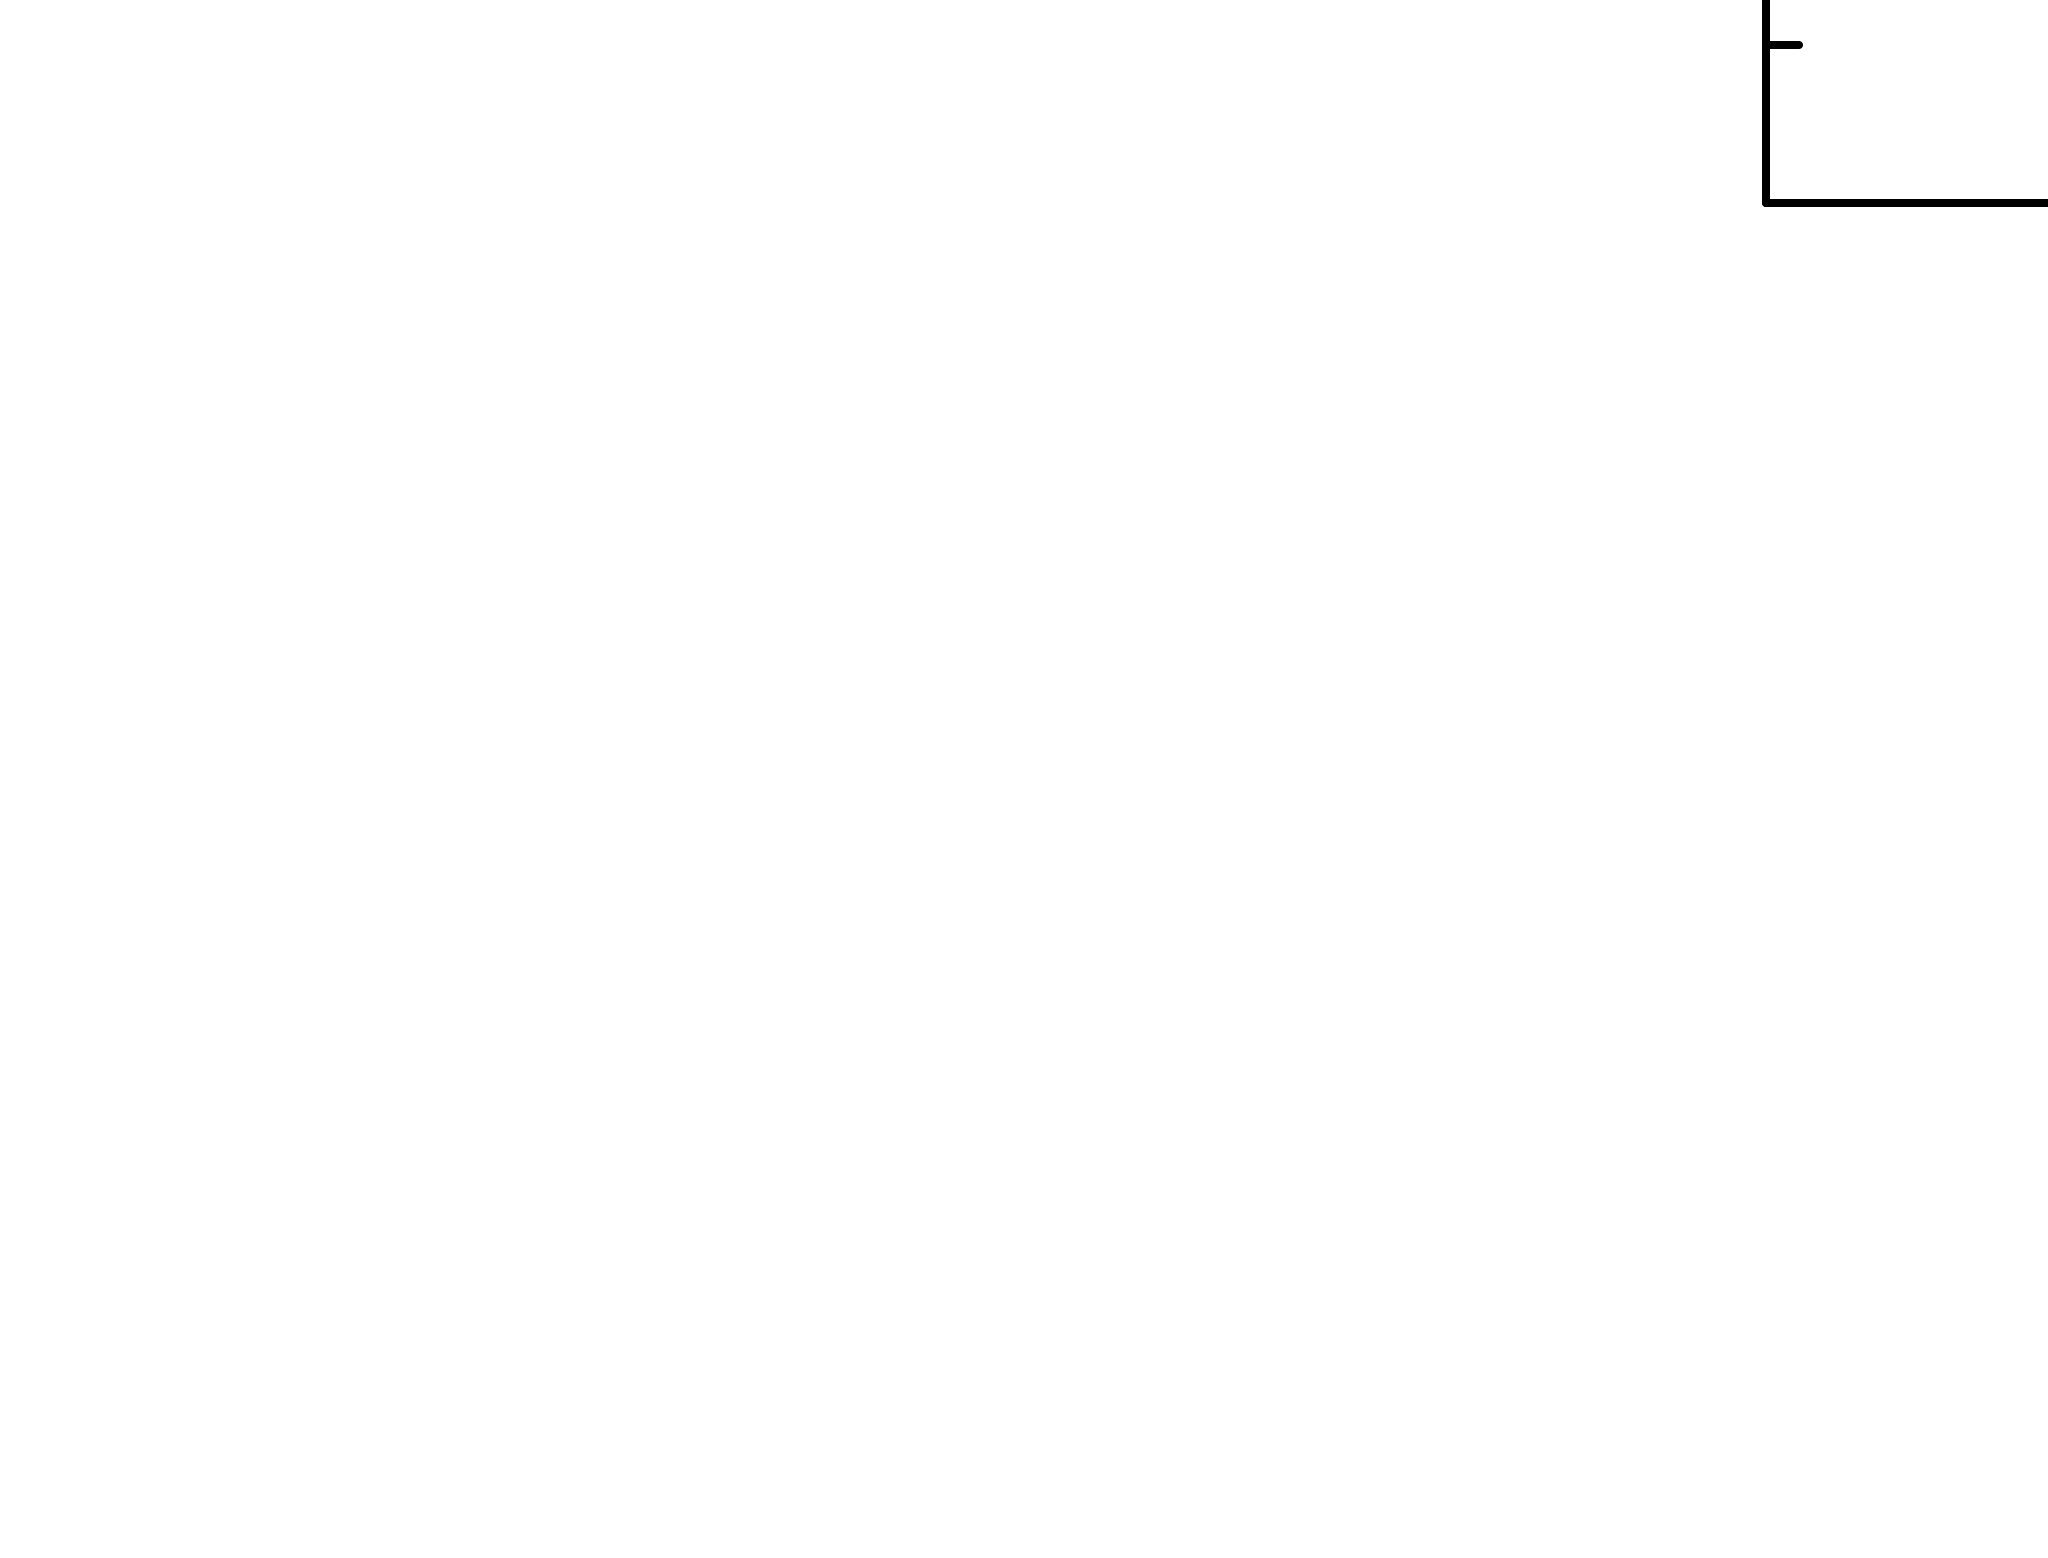

In [2]:
spec_fnames = glob.glob('*grp*')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.005 1.0")
Plot("data")

     1 channels (1) ignored in spectrum #     1
     1 channels (70) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sect

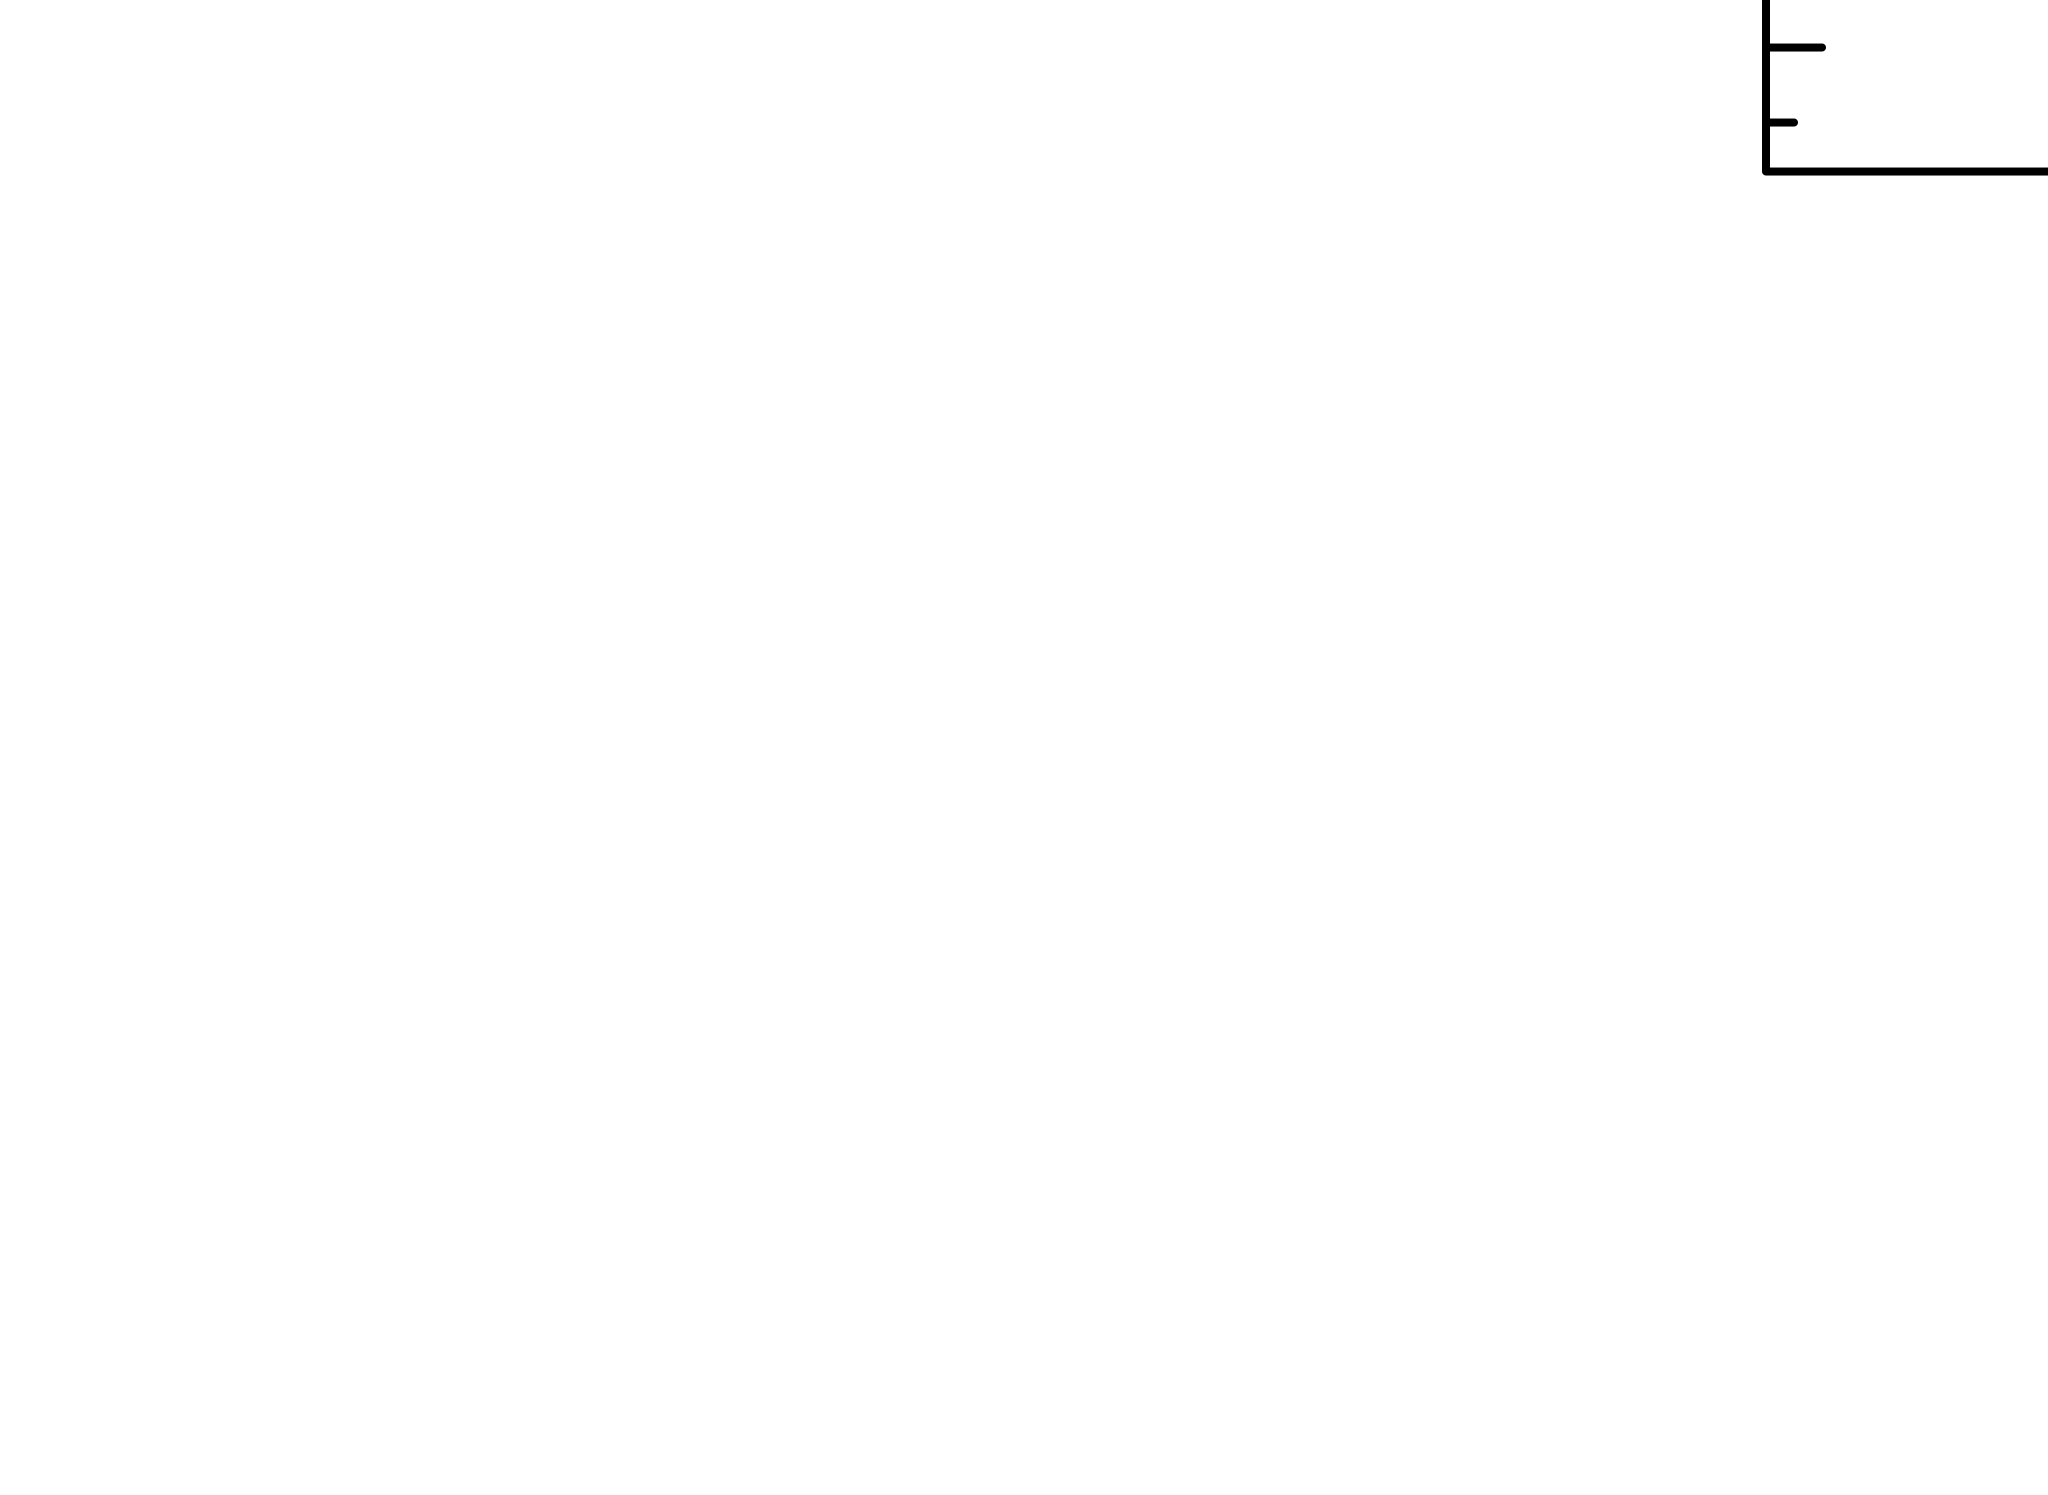

In [3]:
spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.753272e+10     using 68 bins.

Test statistic : Chi-Squared              4.753272e+10     using 68 bins.
 Null hypothesis probability of 0.000000e+00 with 65 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
2086.65      1648.72      -3      0.191047      0.925389   0.000416369
824.622      3.28501e+06  -4      0.409966       1.32611   0.000756729
114.148      1.66257e+06  -5      0.421378       1.29741   0.00088469

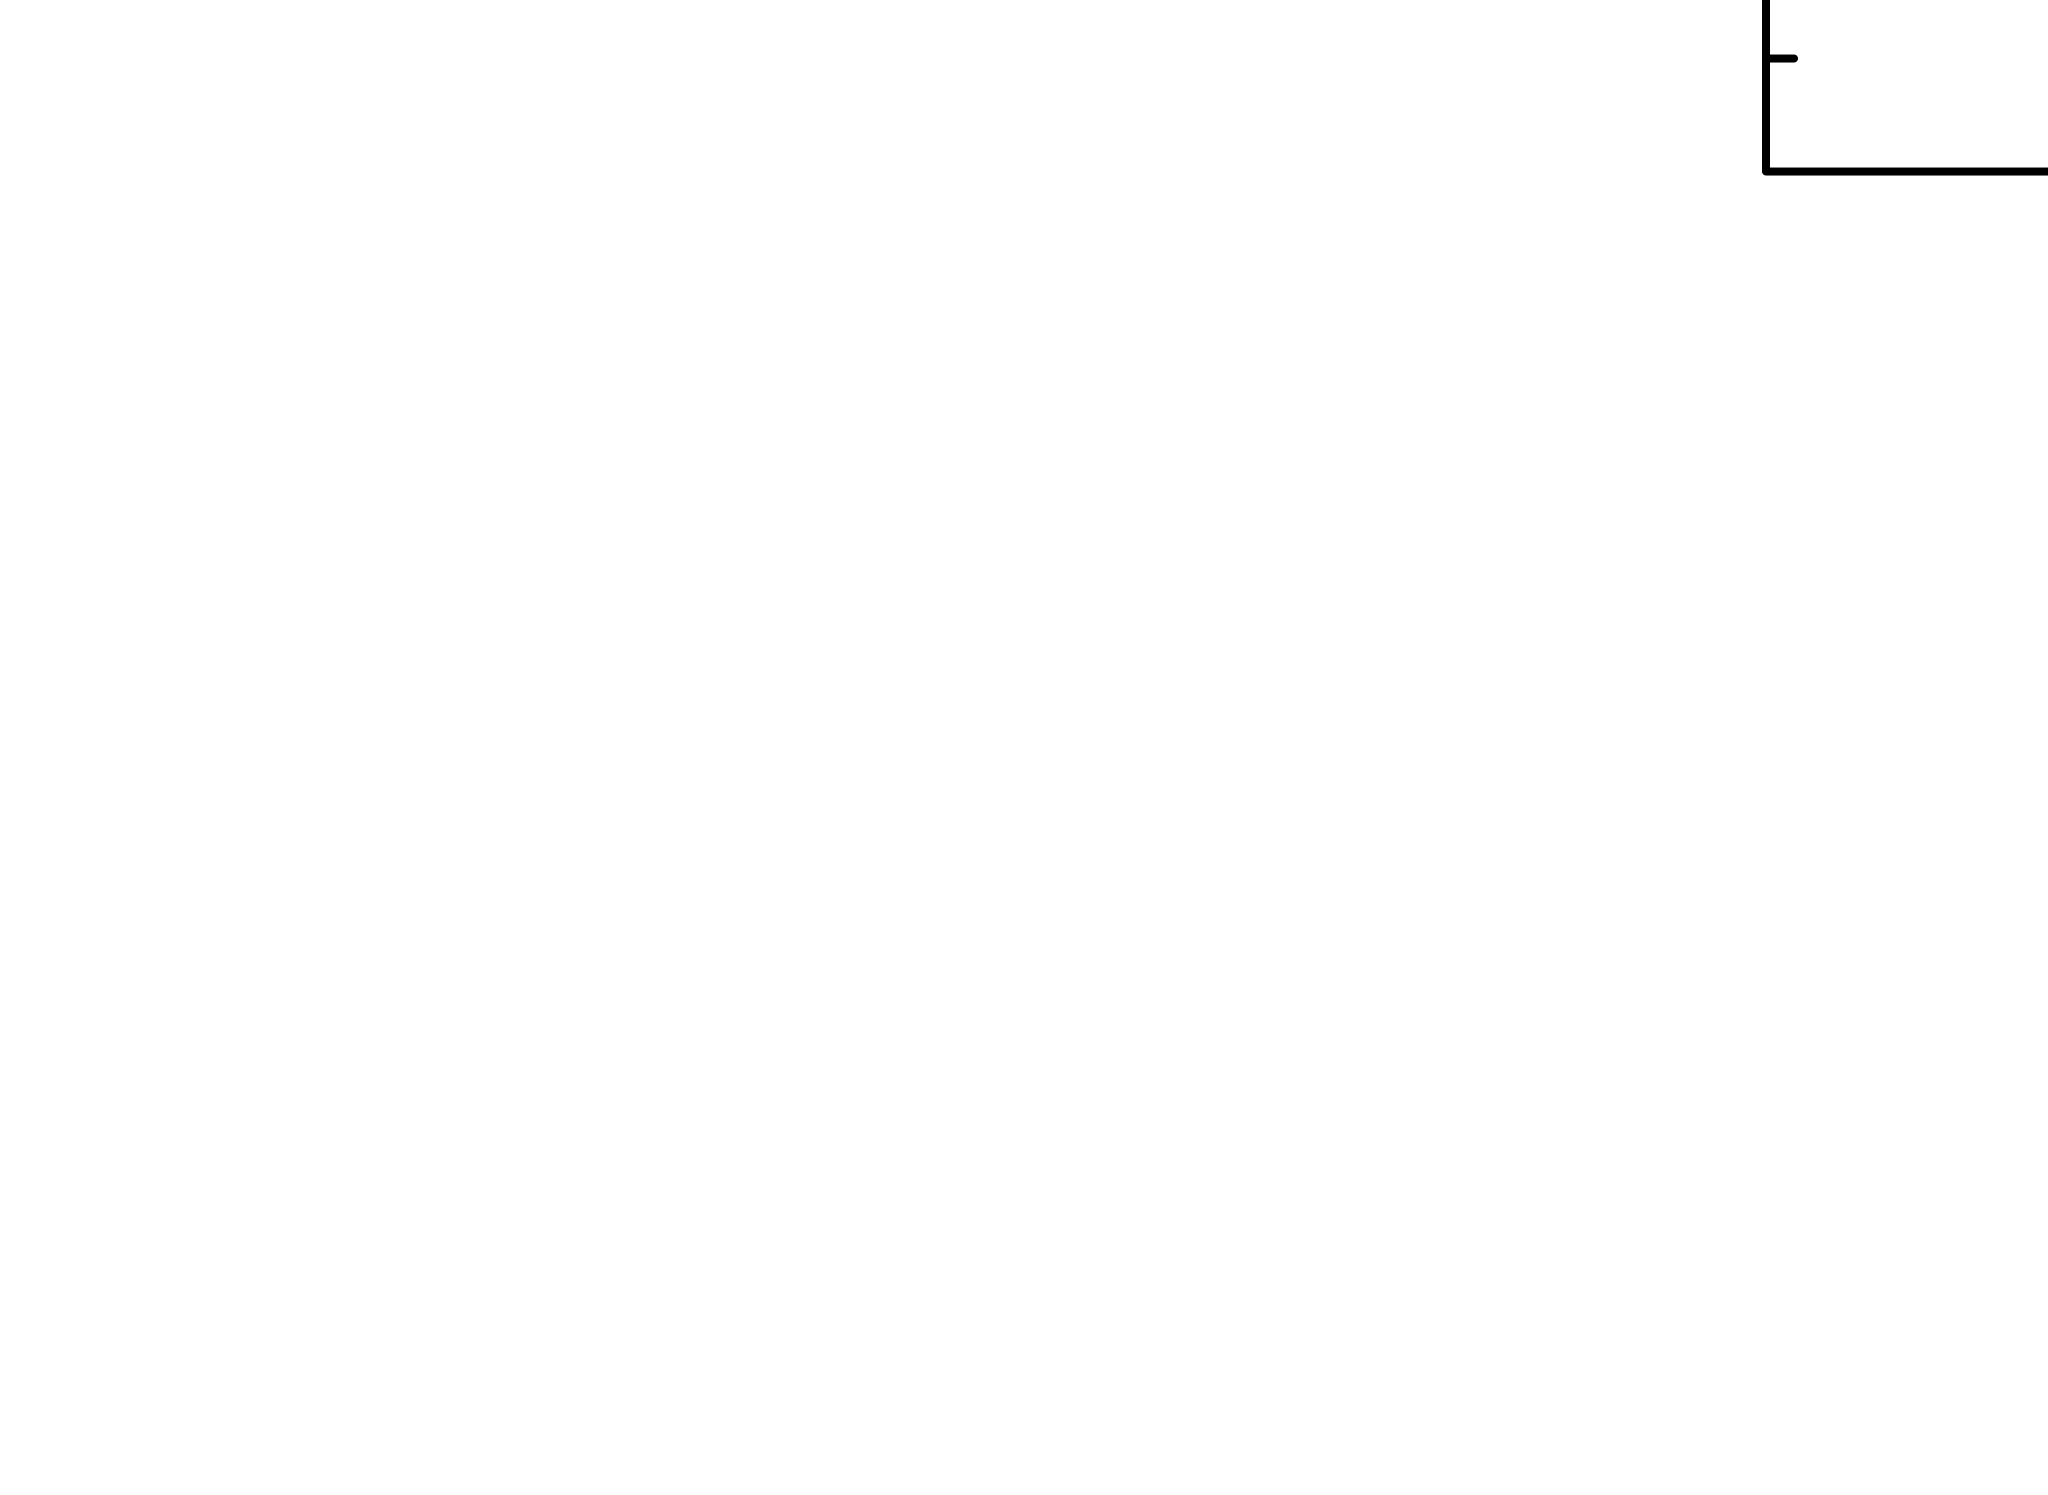

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              6.486647e+09     using 68 bins.

Test statistic : Chi-Squared              6.486647e+09     using 68 bins.
 Null hypothesis probability of 0.000000e+00 with 65 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
752.108      669.672      -1      0.554605       10.5187    0.00149200
562.597      364379       -2      0.365184       22.1253    0.00136283
153.611      406520       -3      0.393749       41.4646    0.00163950


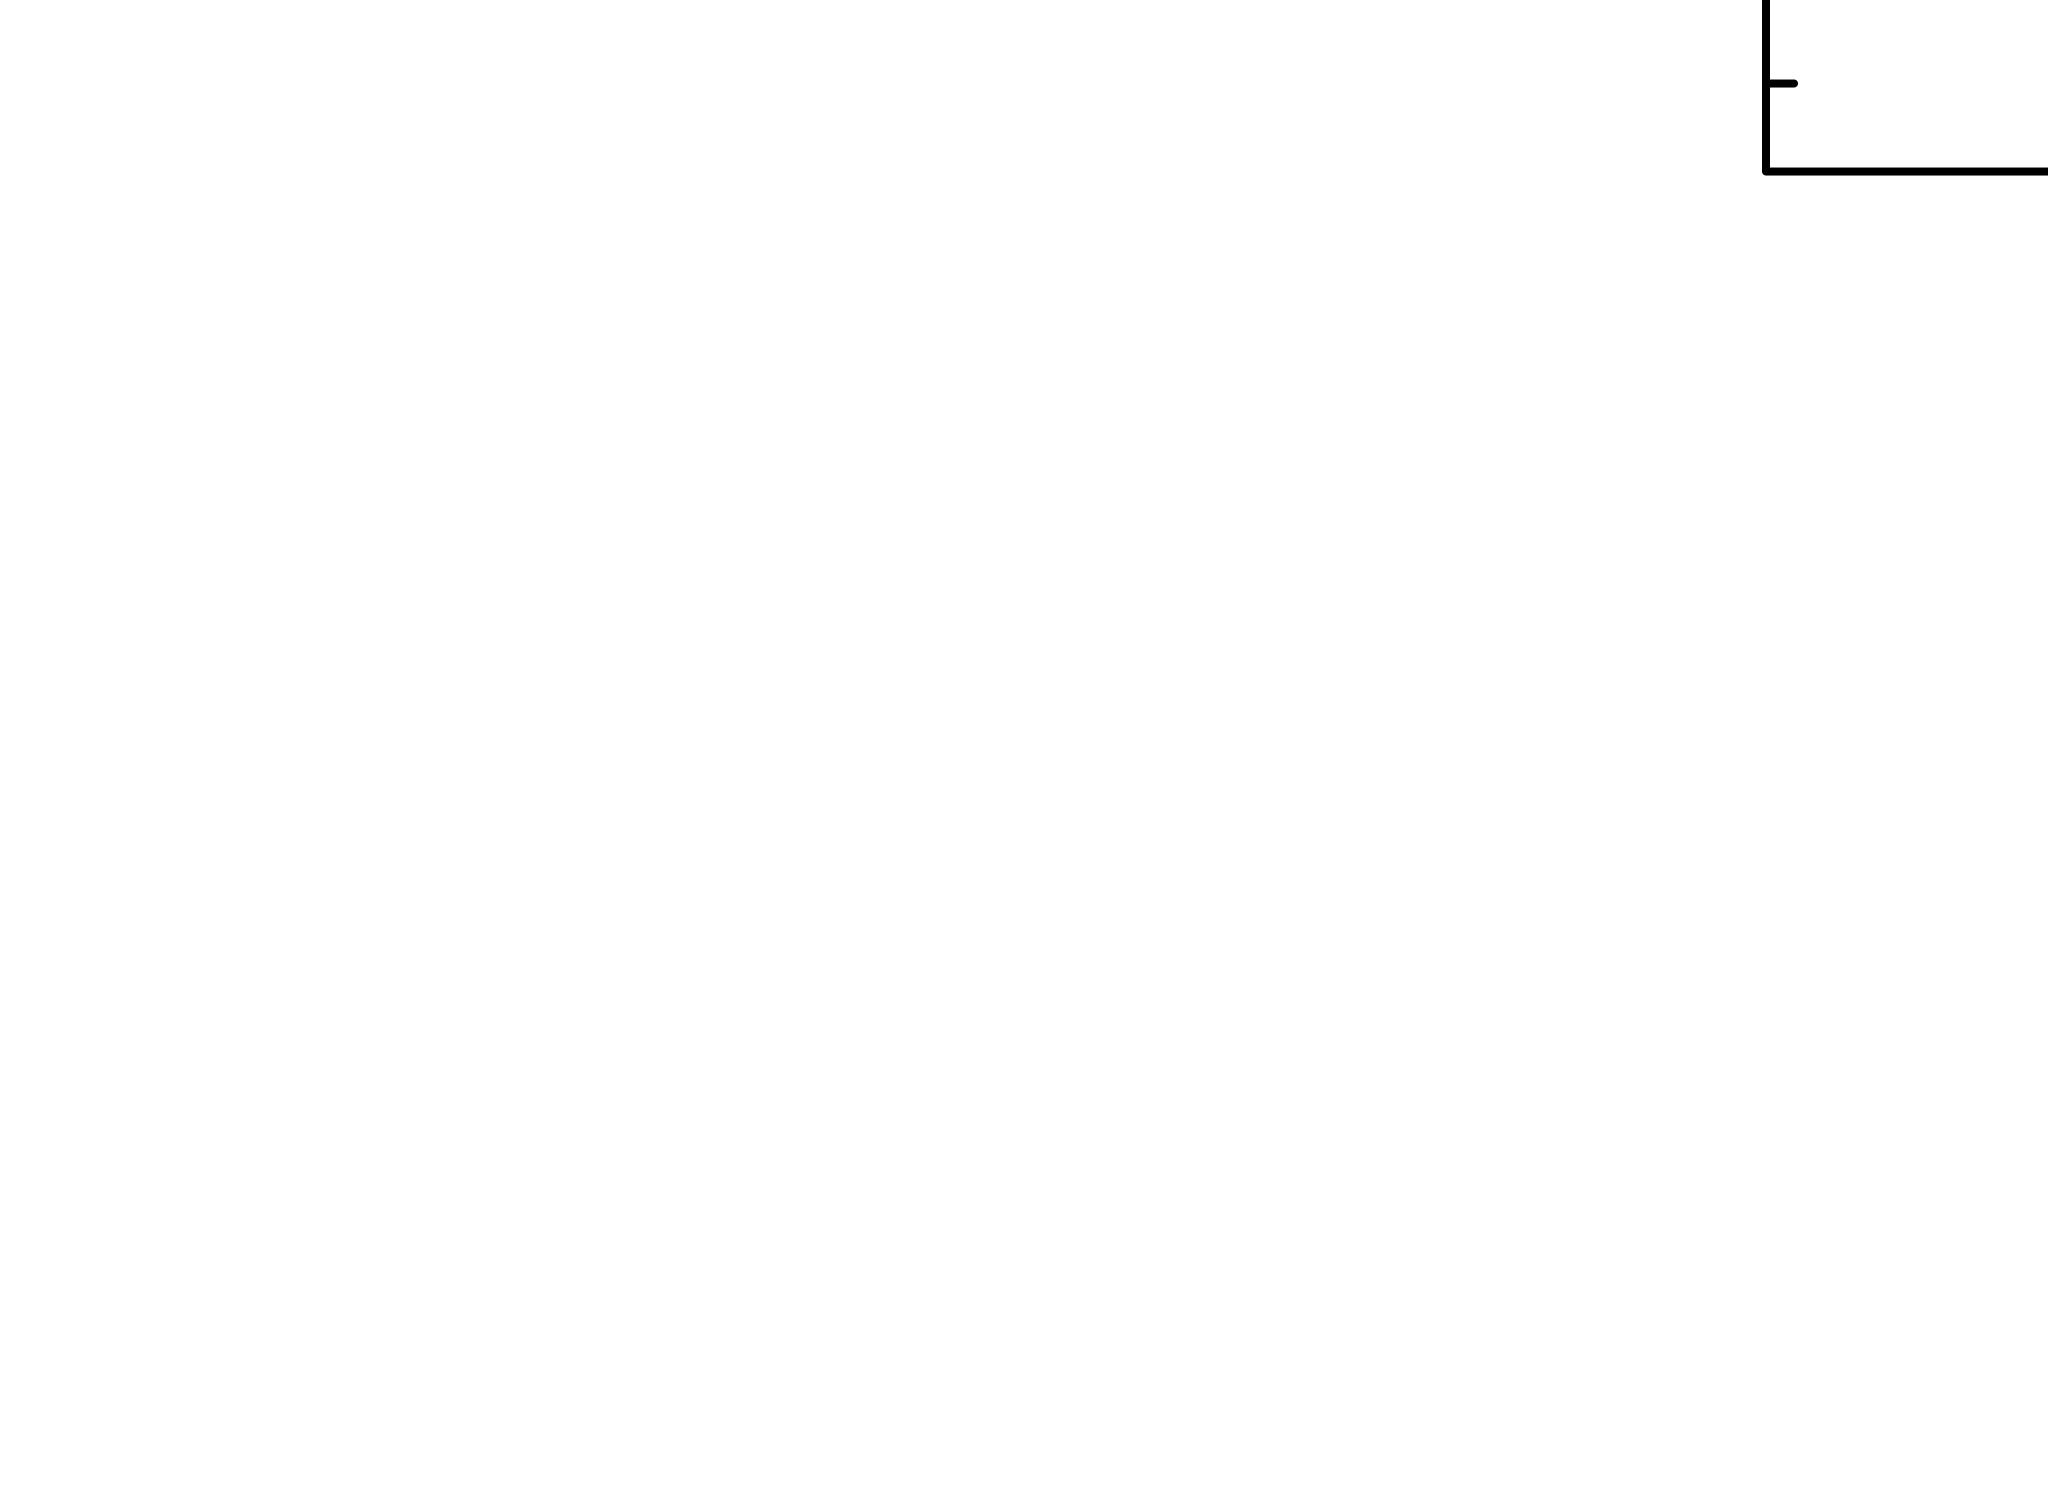

In [5]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.701330e+09     using 68 bins.

Test statistic : Chi-Squared              1.701330e+09     using 68 bins.
 Null hypothesis probability of 0.000000e+00 with 65 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
12273.6      2431.45      -3       1.66111      0.901059   

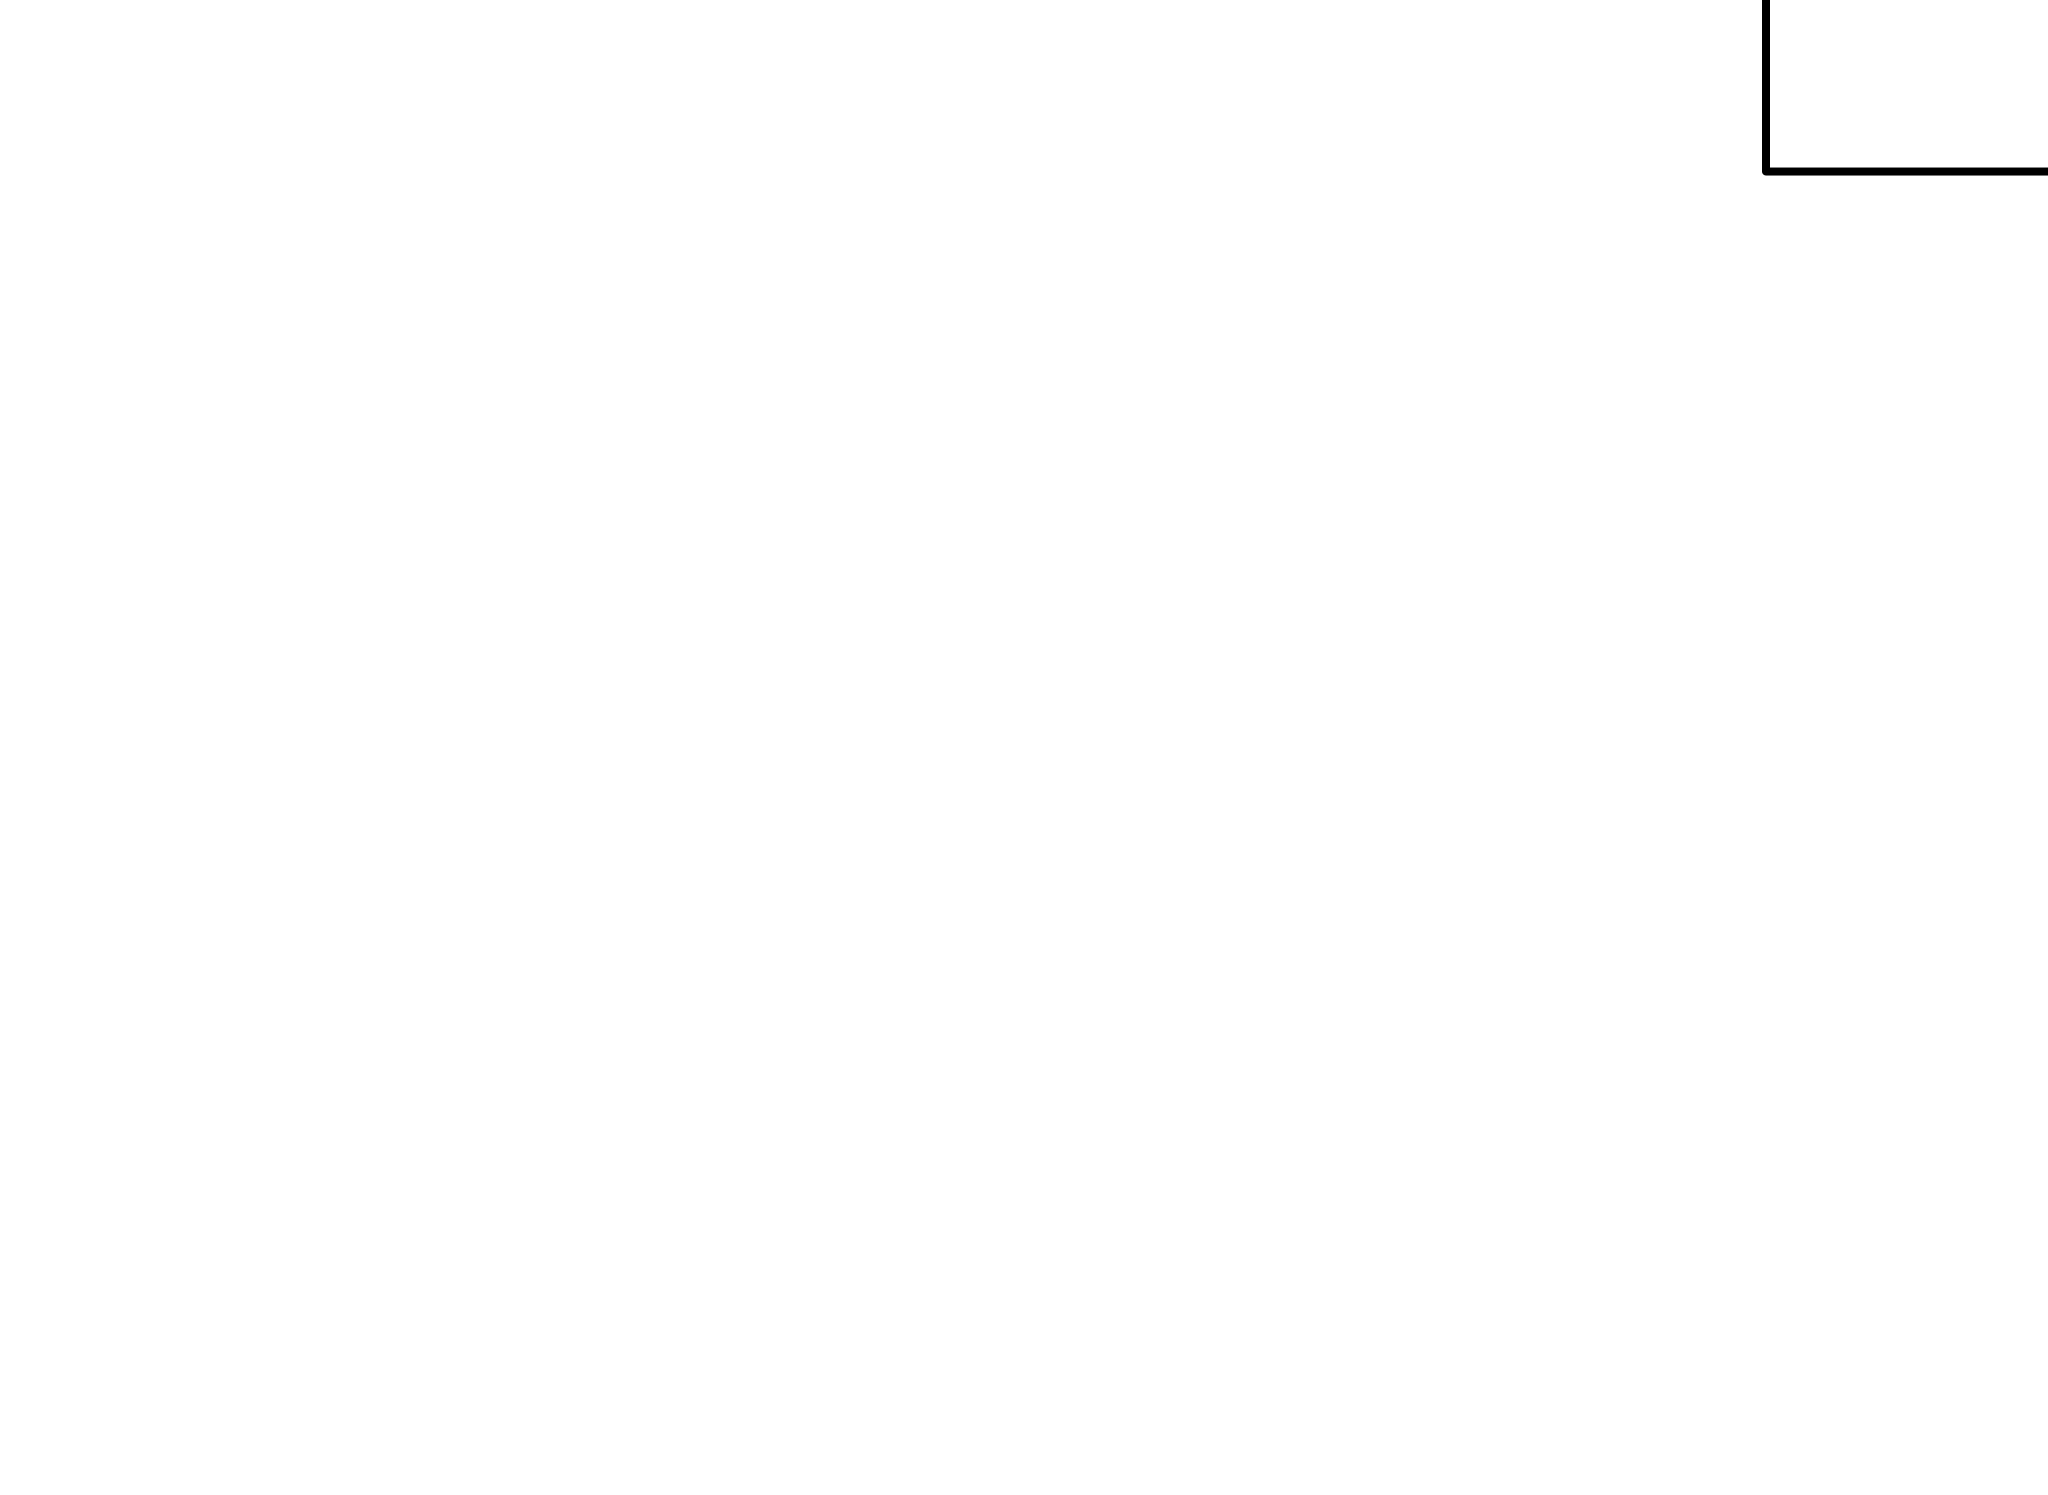

In [6]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [7]:
AllModels.calcFlux(".2 12.0")

 Model Flux  0.001369 photons (8.6281e-12 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [8]:
plx = 0.5548
d_kpc = 1/plx
F_x = 8.6179*10**-12

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

3.348960524620889e+33


In [9]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

1.8024513338139871
33.52491002838777


In [10]:
F_opt = 1.05*10**-5 * 10**(-0.4*8.3966)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  4.597791775415897e-09
F_x / F_opt:  -2.727147848735106



Model TBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              6.824535e+09     using 68 bins.

Test statistic : Chi-Squared              6.824535e+09     using 68 bins.
 Null hypothesis probability

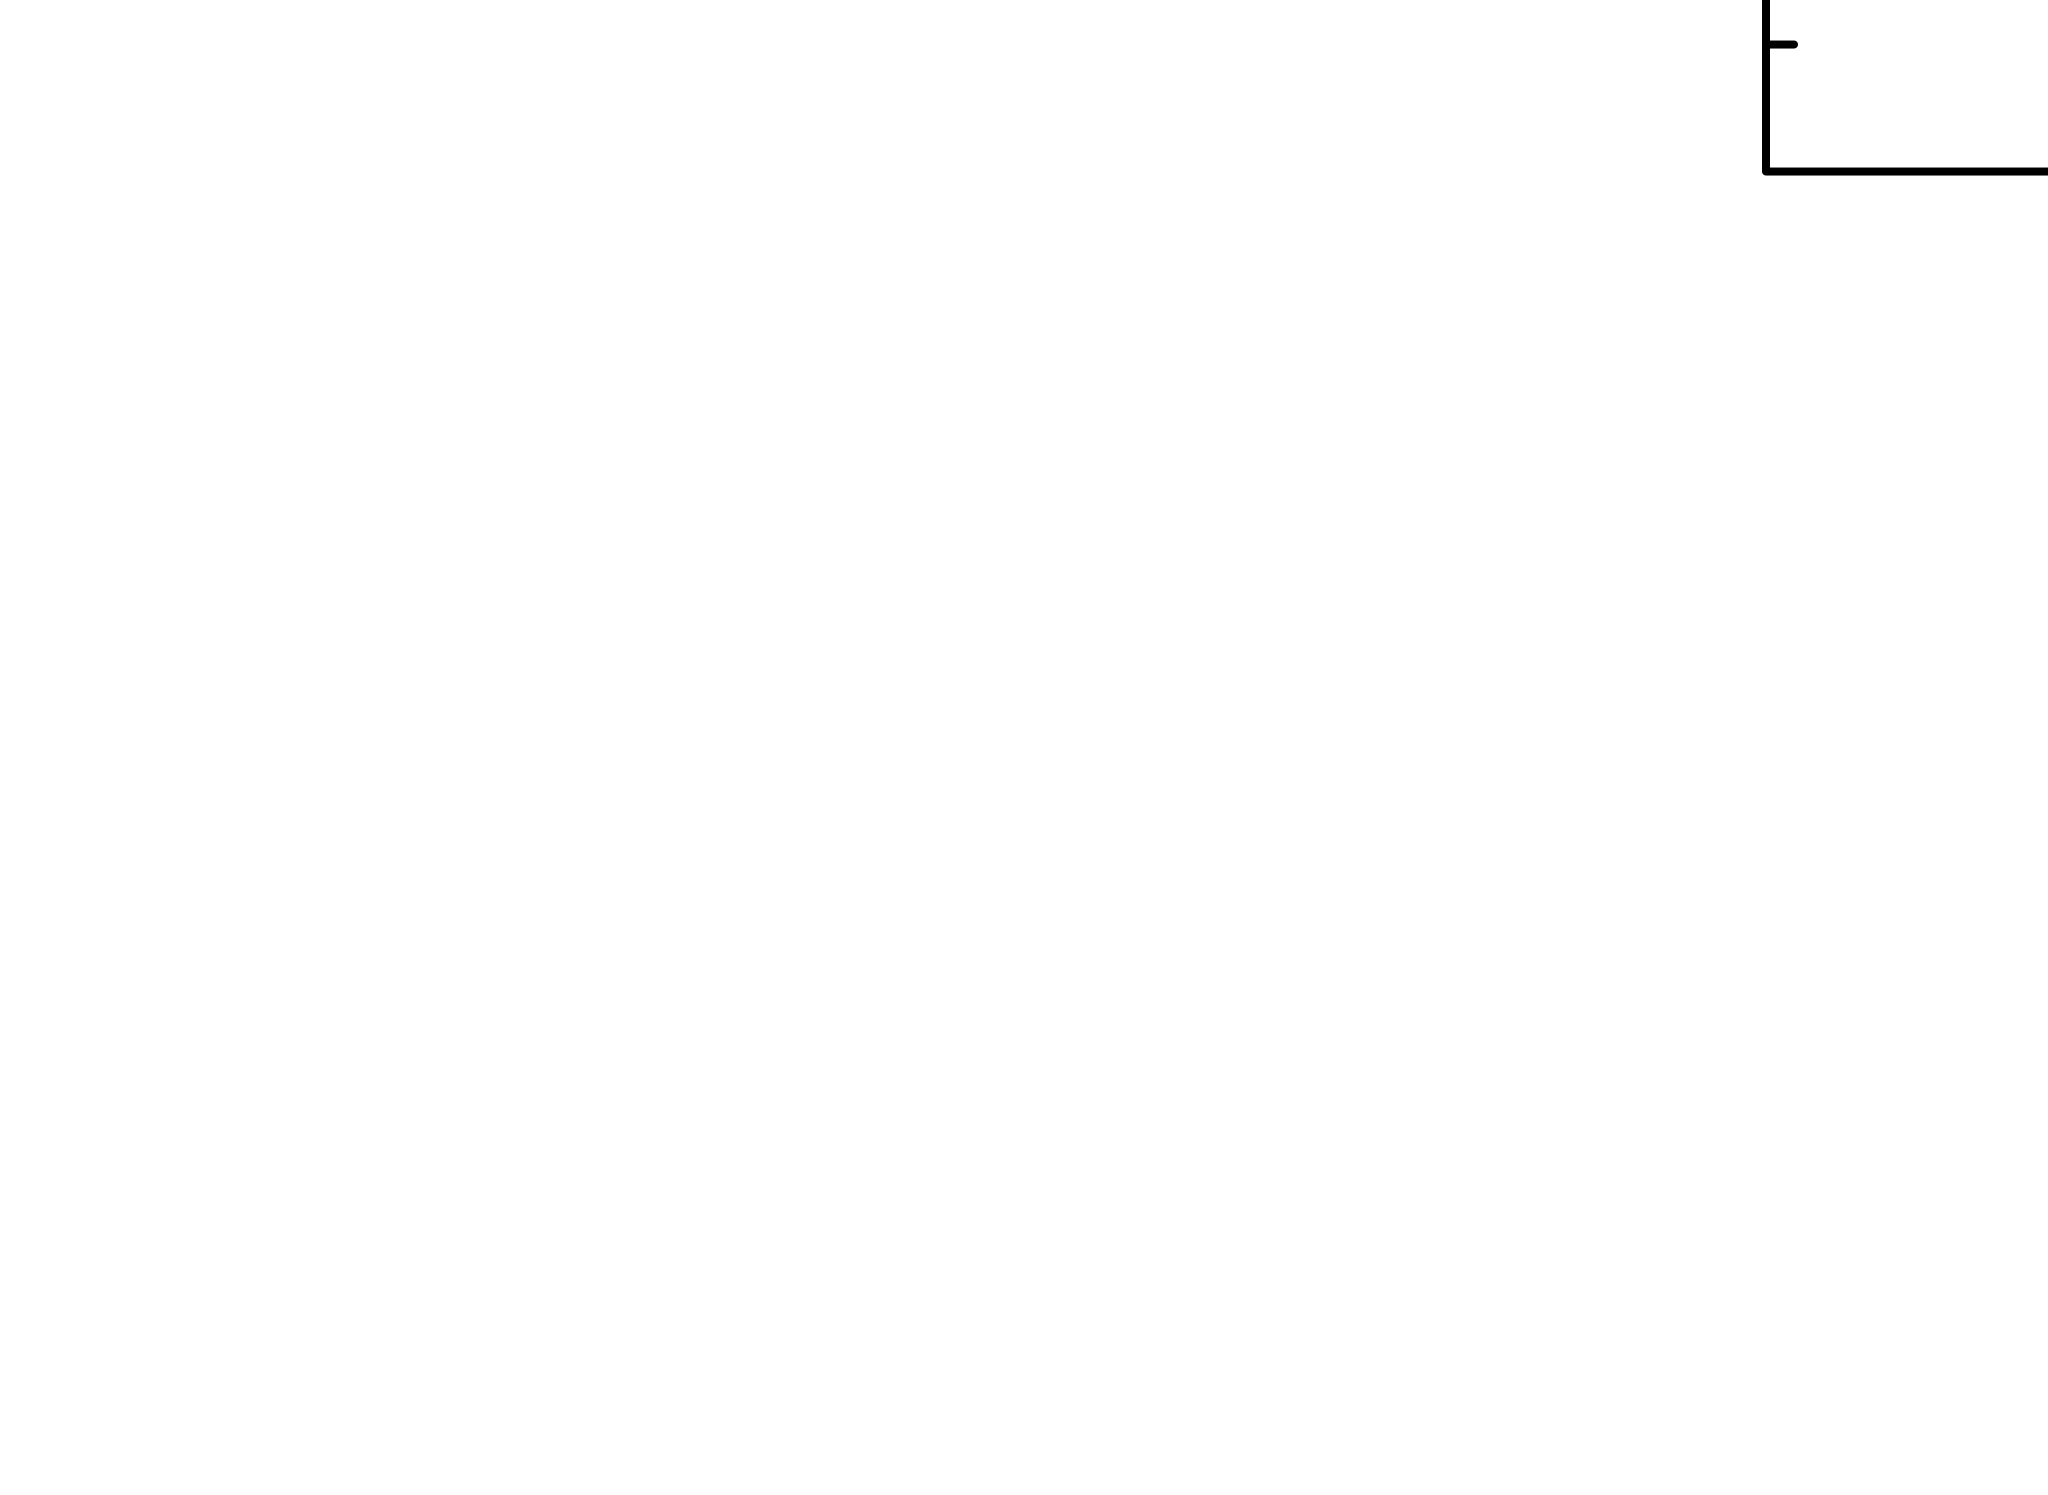

In [11]:
AllModels.clear()
mo = Model("tbabs*(apec+apec)")
mo.apec.kT = 0.5
mo.apec_3.kT = 10.0
Fit.perform()
Plot("data resid")


Model TBabs<1>(apec<2> + apec<3> + apec<4>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
  10    4   apec       kT         keV      1.00000      +/-  0.0          
  11    4   apec       Abundanc            1.00000      frozen
  12    4   apec       Redshift            0.0          frozen
  13    4   apec       norm              

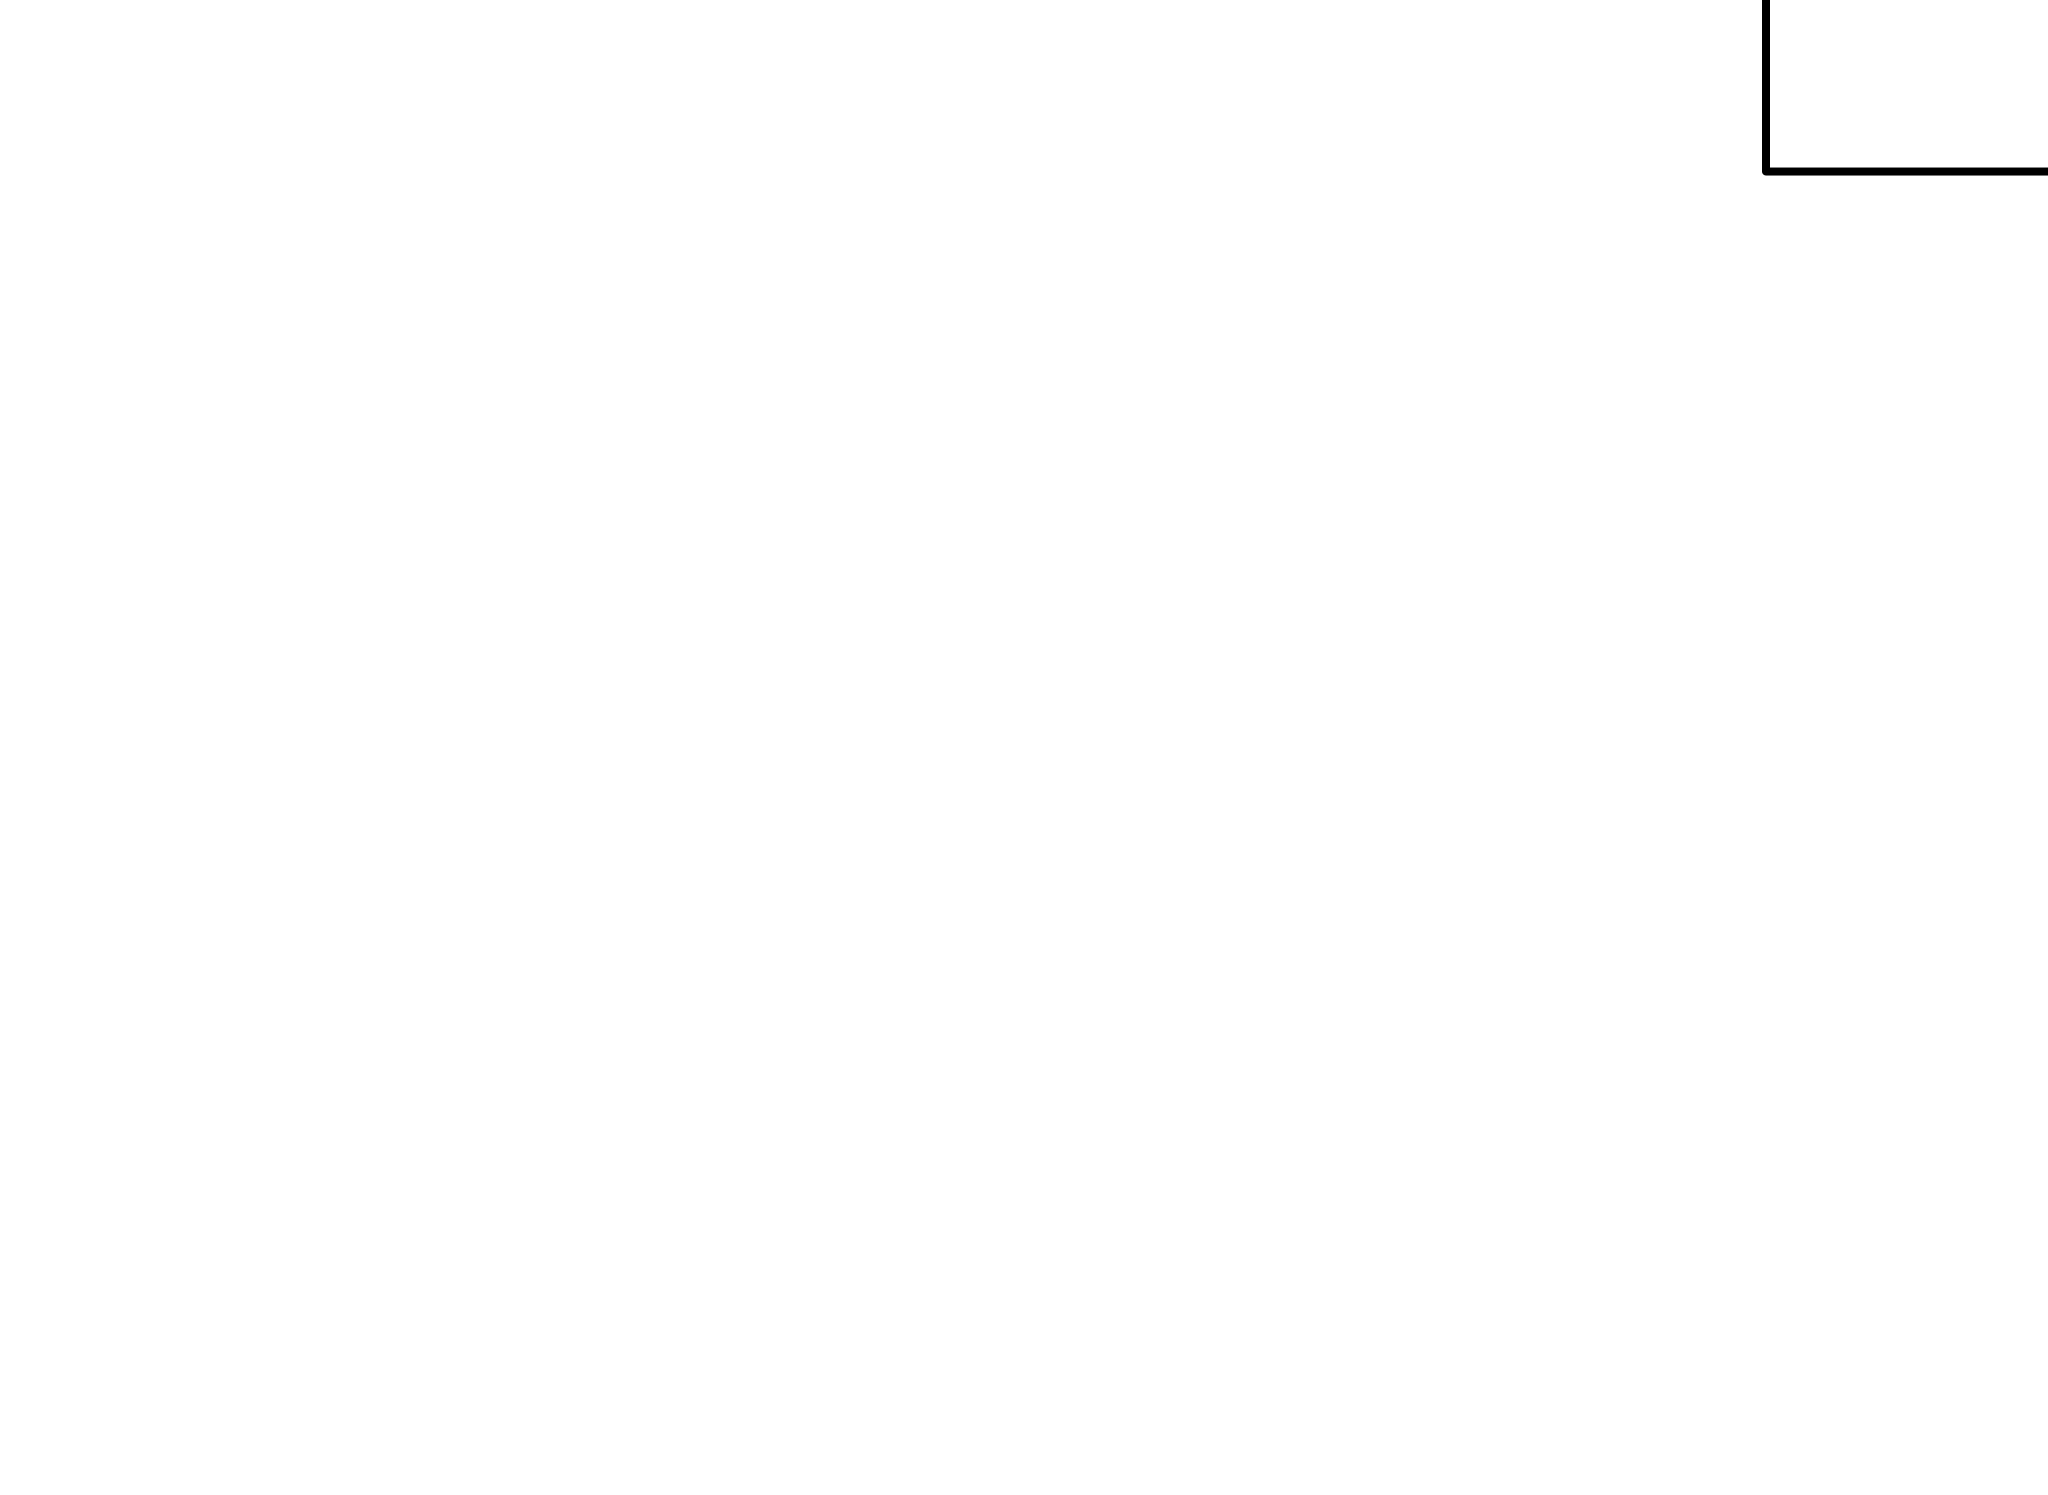

In [12]:
AllModels.clear()
mo = Model("tbabs*(apec+apec+apec)")
mo.apec.kT = 0.5
mo.apec_3.kT = 8.0
mo.apec_4.kT = 30.0
Fit.perform()
Plot("data resid")


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.403464e+11     using 68 bins.

Test statistic : Chi-Squared              5.403464e+11     using 68 bins.
 Null hypothesis probability of 0.000000e+00 with 63 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              5.553946e+12     using 68 bins.

Test statistic : Chi-Squared             

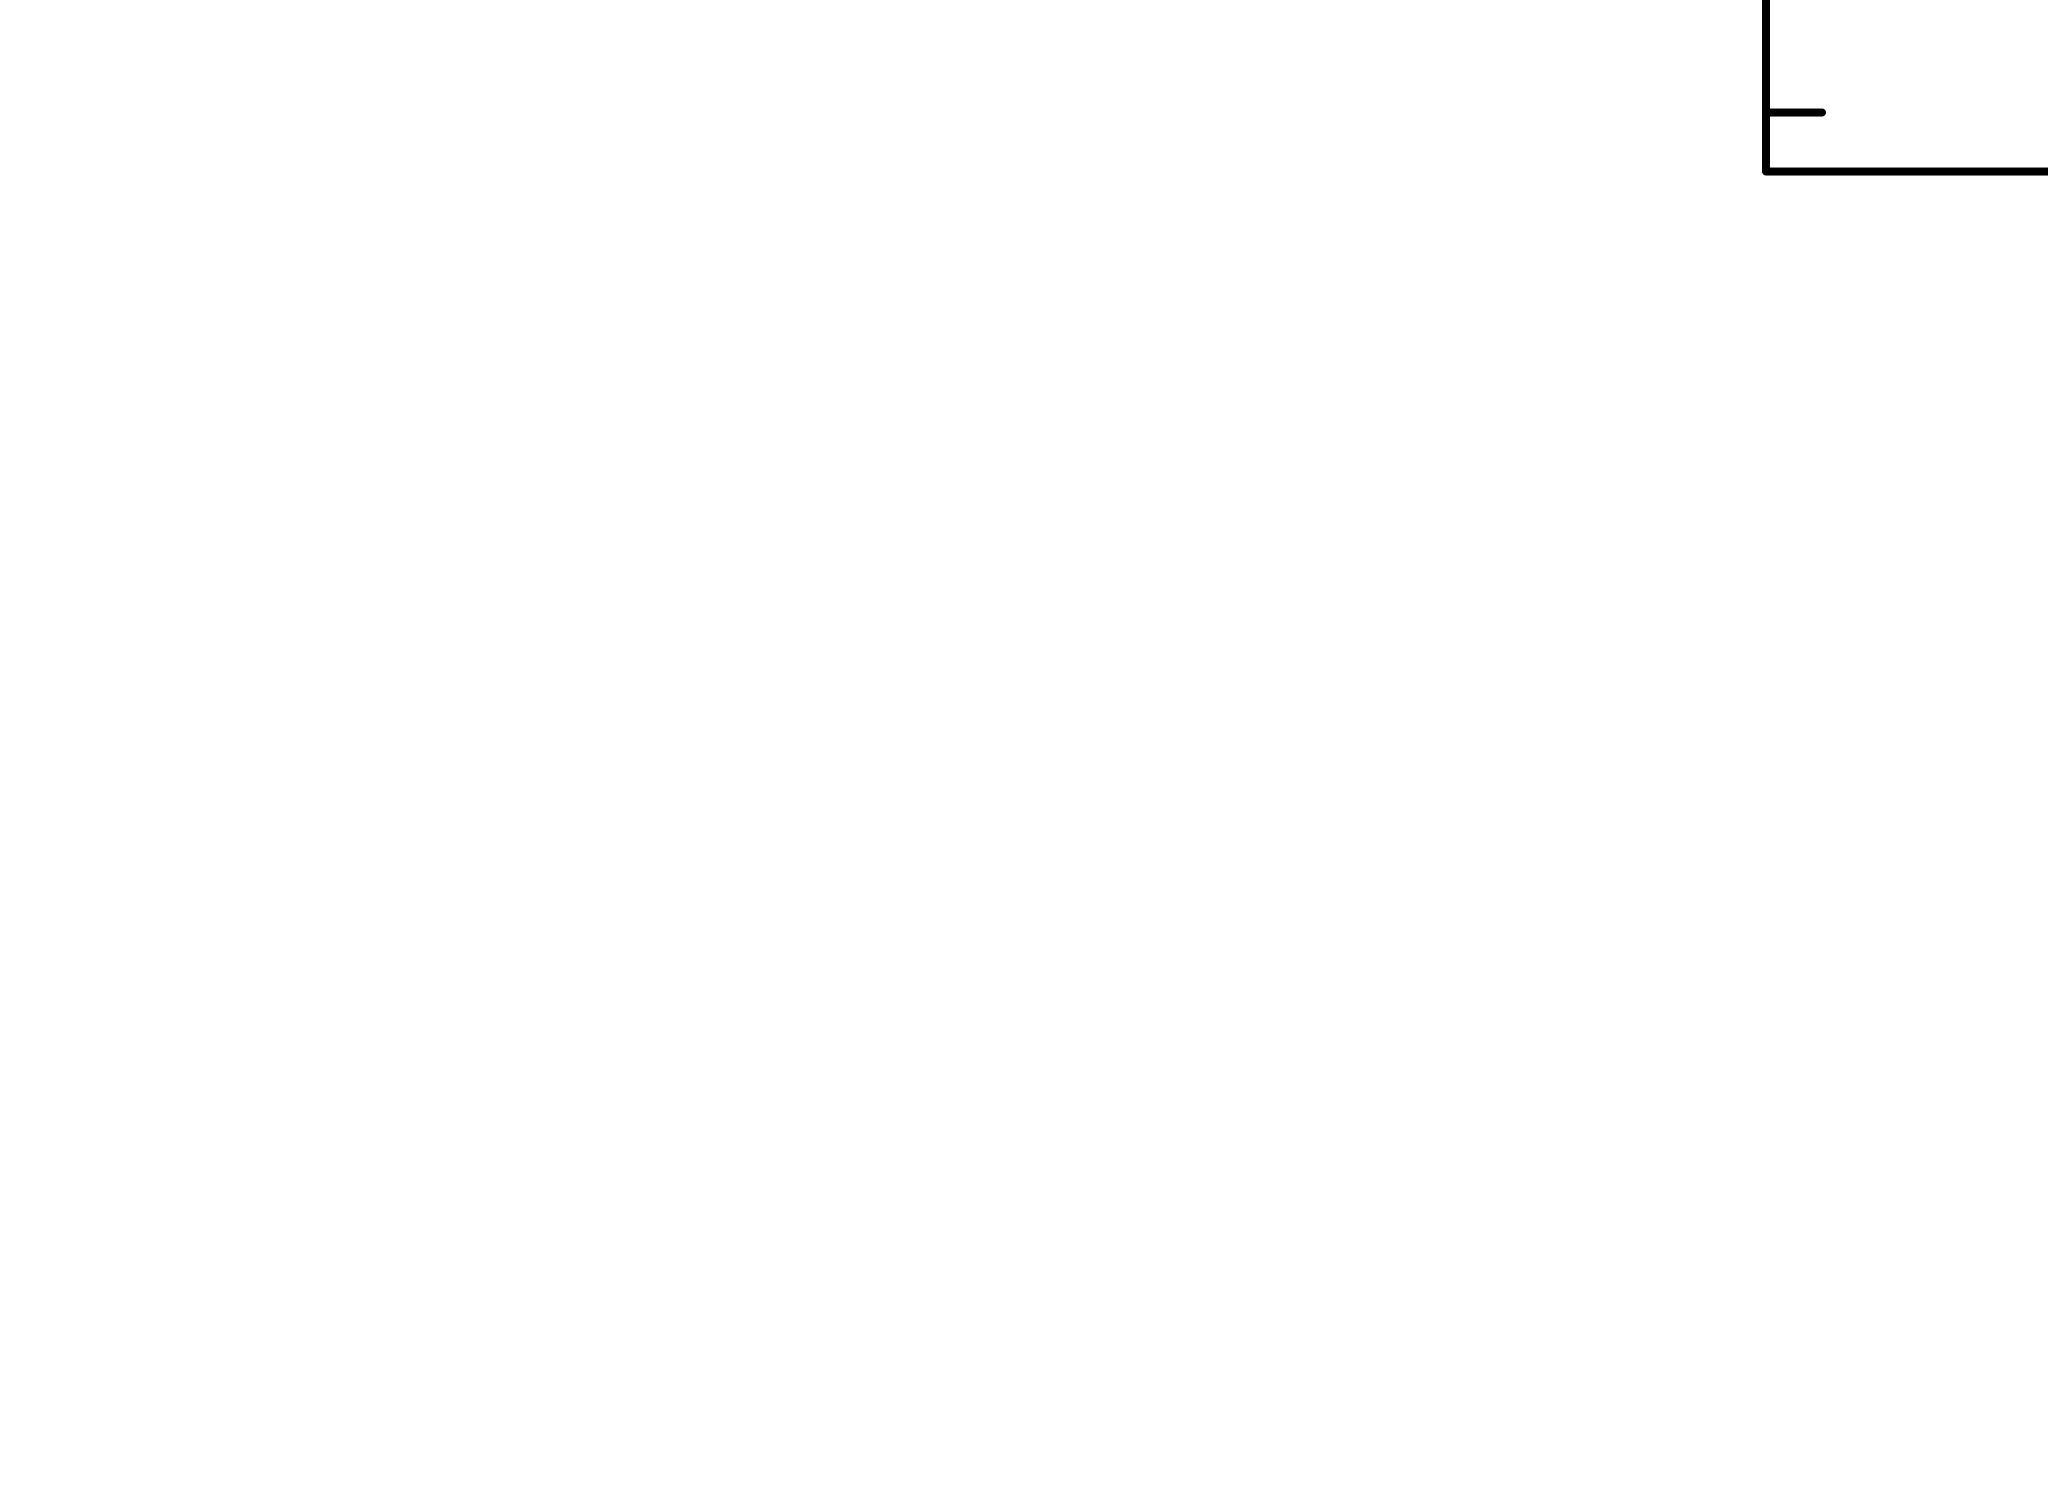

 5.553946e+12     using 68 bins.
 Null hypothesis probability of 0.000000e+00 with 63 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              5.177406e+12     using 68 bins.

Test statistic : Chi-Squared              5.177406e+12     using 68 bins.
 Null hypothesis probability of 0.000000e+00 with 63 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
6632.54      694392        0      0.994636      0.507004   6.21224e-05      0.971133   9.76184e-05
3586.32      5.18946e+06   0      0.966625      0.507134   5.50876e-05      0.255789   0.000159898
1207.02      1.26549e+07  -1      0.557597      0.523287   3.10505e-05      0.317269   0.000150603
257.548      4.79192e+06  -1      0.221334      0.580863   2.45096e-05      0.351892   0.000154899
195.863      1.69314e+06  -2      0.227602      0.608883  

In [13]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
mo.bbody.kT = 0.5
mo.powerlaw.PhoIndex = 2.0
Fit.perform()
Plot("data resid")


Model TBabs<1>(bbody<2> + powerlaw<3> + gaussian<4>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
   6    4   gaussian   LineE      keV      6.50000      +/-  0.0          
   7    4   gaussian   Sigma      keV      0.100000     +/-  0.0          
   8    4   gaussian   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.004218e+12     using 68 bins.

Test statistic : Chi-Squared              1.004218e+12     using 68 bins.
 Null hypothesis probability of 0.00

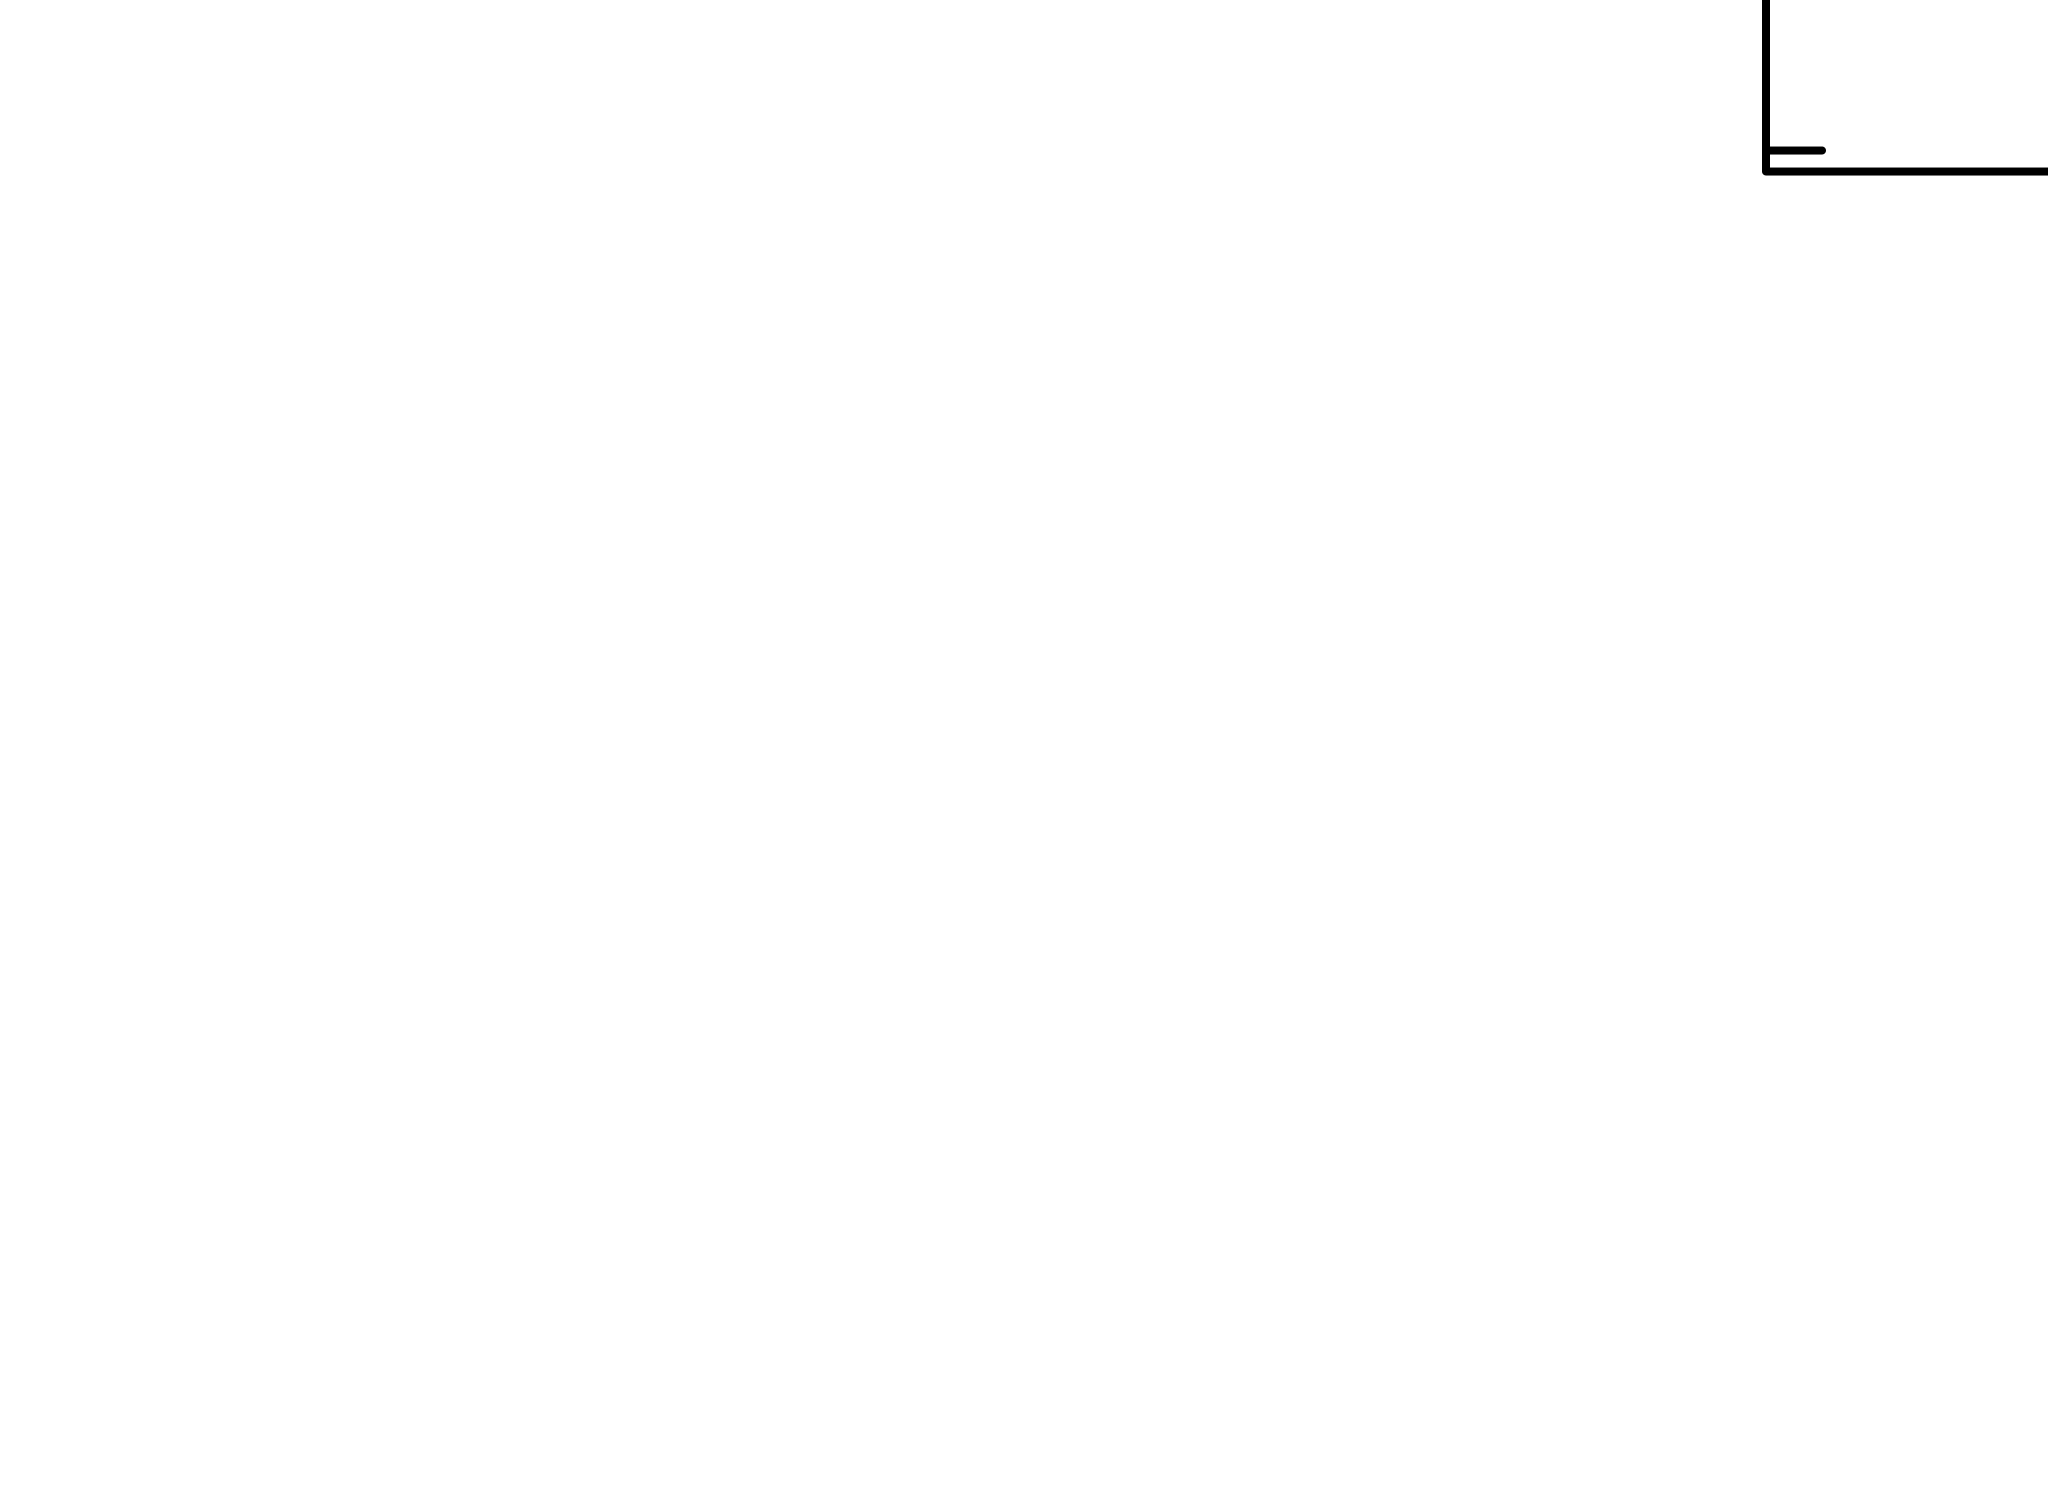

In [14]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw+gaussian)")
mo.bbody.kT = 0.5
mo.powerlaw.PhoIndex = 2.0
mo.gaussian.LineE = 6.4
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot("data resid")


Model TBabs<1>(bbody<2> + powerlaw<3> + gaussian<4>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
   6    4   gaussian   LineE      keV      6.50000      +/-  0.0          
   7    4   gaussian   Sigma      keV      0.100000     +/-  0.0          
   8    4   gaussian   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.004218e+12     using 68 bins.

Test statistic : Chi-Squared              1.004218e+12     using 68 bins.
 Null hypothesis probability of 0.00

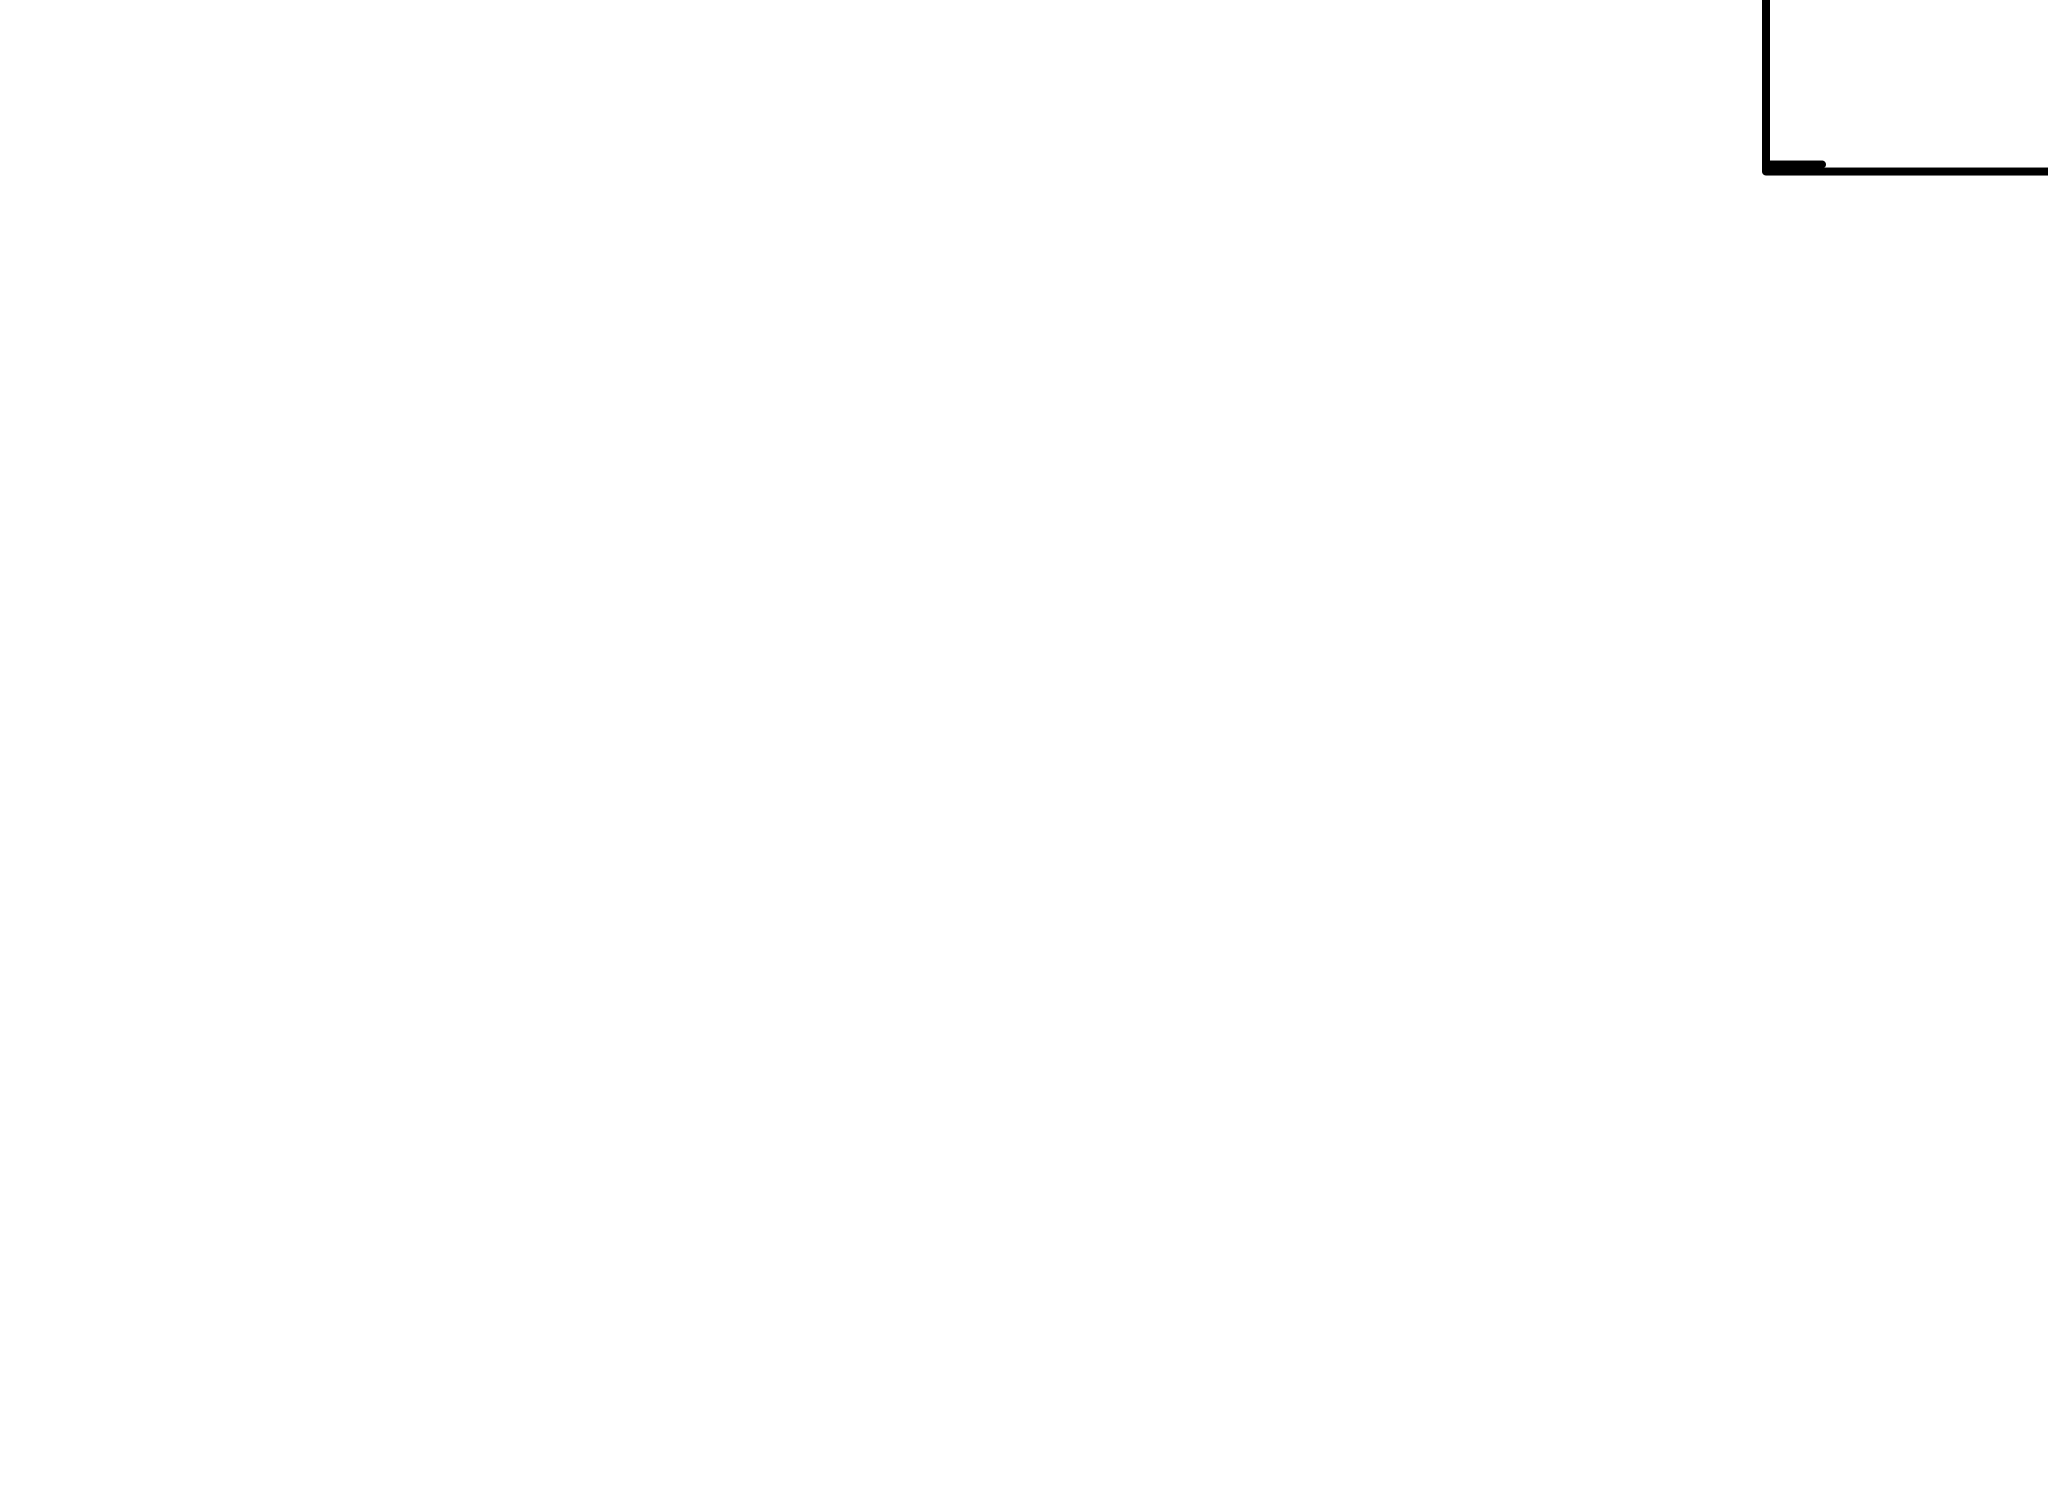

In [15]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw+gaussian)")
mo.bbody.kT = 0.5
mo.powerlaw.PhoIndex = 2.0
mo.gaussian.LineE = 6.7
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot("data resid")

In [16]:
AllModels.calcFlux(".2 12.0")

 Model Flux  0.001385 photons (8.8909e-12 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [18]:
plx = 0.5548
d_kpc = 1/plx
F_x = 8.8909*10**-12

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

3.4550497369837034e+33


In [19]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

1.8024513338139871
33.5384543036182


In [20]:
F_opt = 1.05*10**-5 * 10**(-0.4*8.3966)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  4.597791775415897e-09
F_x / F_opt:  -2.713603573504676


In [21]:
Fit.error("1")

 Parameter   Confidence Range (2.706)
     1     0.384334     0.463333    (-0.036141,0.0428576)


In [22]:
Fit.error("4")

 Parameter   Confidence Range (2.706)
     4      1.20717      1.45268    (-0.107344,0.138171)


In [23]:
Fit.error("2")

 Parameter   Confidence Range (2.706)
***Warning: Zero alpha-matrix diagonal element for parameter 3
 Parameter 3 is pegged at 1.68334e-06 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
***Warning: Zero alpha-matrix diagonal element for parameter 3
 Parameter 3 is pegged at 1.68334e-06 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
***Warning: Zero alpha-matrix diagonal element for parameter 3
 Parameter 3 is pegged at 1.68334e-06 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
***Warning: Zero alpha-matrix diagonal element for parameter 3
 Parameter 3 is pegged at 1.68334e-06 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
***Warning: Zero alpha-matrix diagonal element for parameter 3
 Parameter 3 is pegged at 1.68334e-06 due to zero or negative pivot element, likely
 caused


Model TBabs<1>*phabs<2>*apec<3> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   phabs      nH         10^22    1.00000      +/-  0.0          
   3    3   apec       kT         keV      1.00000      +/-  0.0          
   4    3   apec       Abundanc            1.00000      frozen
   5    3   apec       Redshift            0.0          frozen
   6    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.587245e+08     using 68 bins.

Test statistic : Chi-Squared              1.587245e+08     using 68 bins.
 Null hypothesis probability of 0.000000e+00 with 64 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lv

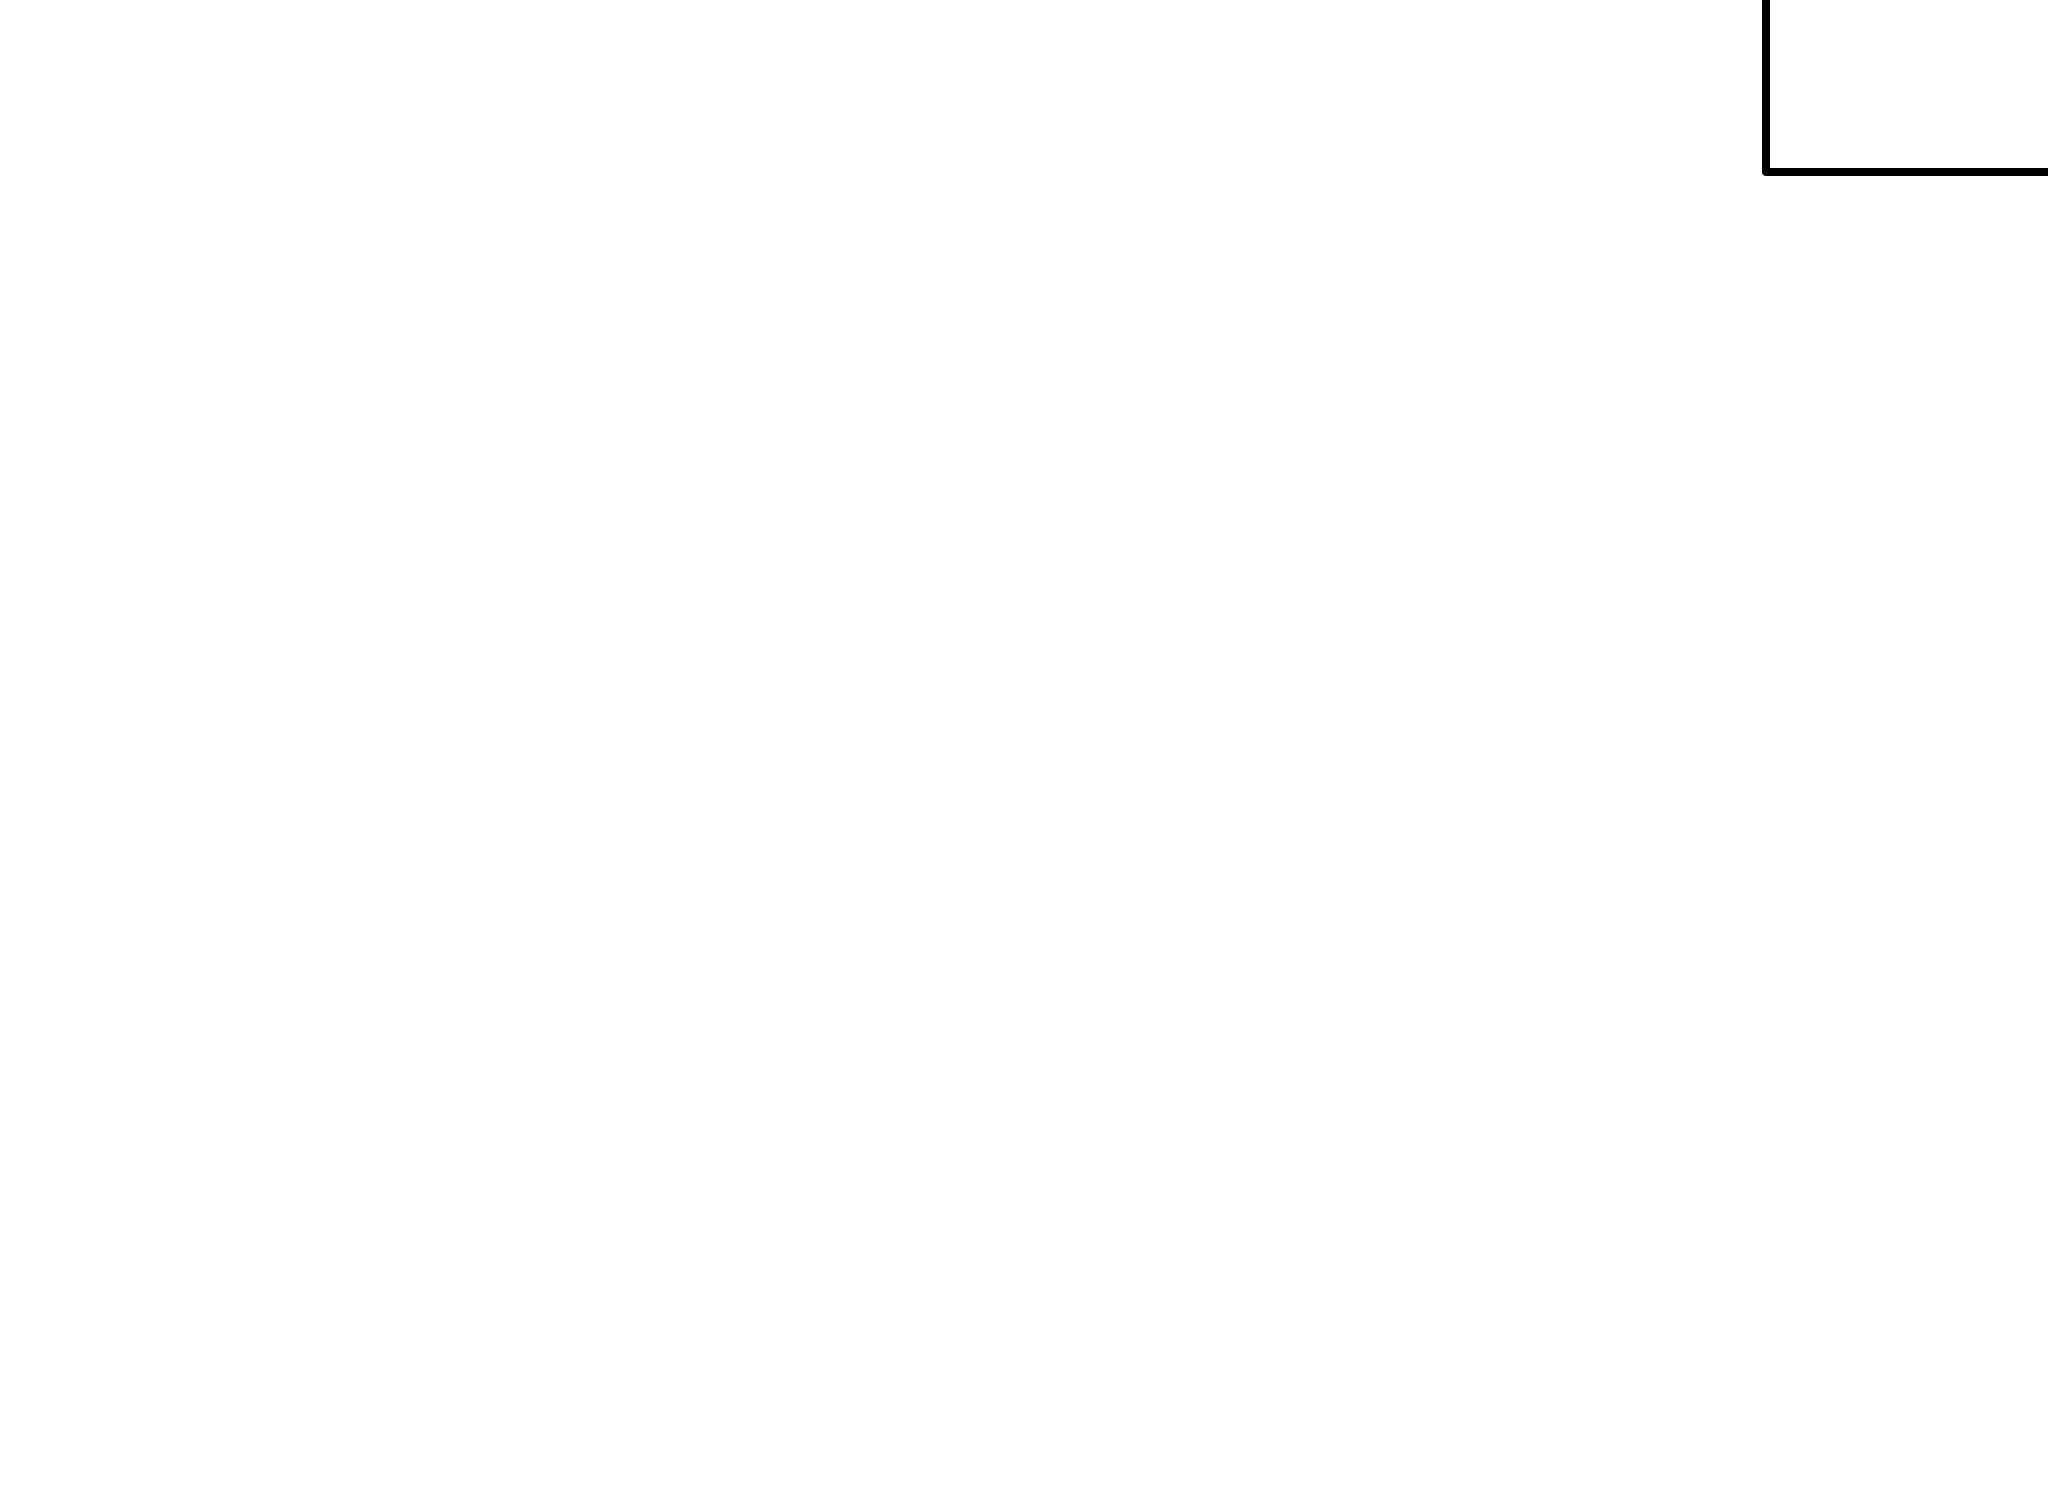

l          1:nH          2:nH          3:kT        6:norm
8960.93      945.695      -1      0.920091      0.920056       1.28227    0.00756460
6635.01      93572.8      -2      0.624212      0.620888       1.84876    0.00540286
6607.95      139043       -3      0.160942      0.164479       3.77503    0.00333546
1121.61      372181       -4      0.466709     0.0499139       6.69030    0.00370782
414.92       150806       -3      0.446470    0.00693913       11.7632    0.00380094
205.891      99225.4      -3      0.448617    0.00318798       18.9265    0.00414705
127.083      59457.1      -4     0.0888661      0.339438       26.5666    0.00443268
110.136      2416.31      -3      0.137239      0.281040       35.5914    0.00464764
107.05       3455.32      -3      0.186774      0.227153       41.3931    0.00477484
106.552      1795.73      -3      0.232551      0.180167       42.3965    0.00479172
106.231      26.9097      -3      0.273615      0.137952       42.5458    0.00479397
105.976

In [24]:
AllModels.clear()
mo = Model("tbabs*phabs*(apec)")
Fit.perform()
Plot("data resid")


Model TBabs<1>*phabs<2>(apec<3> + apec<4> + apec<5>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   phabs      nH         10^22    1.00000      +/-  0.0          
   3    3   apec       kT         keV      1.00000      +/-  0.0          
   4    3   apec       Abundanc            1.00000      frozen
   5    3   apec       Redshift            0.0          frozen
   6    3   apec       norm                1.00000      +/-  0.0          
   7    4   apec       kT         keV      1.00000      +/-  0.0          
   8    4   apec       Abundanc            1.00000      frozen
   9    4   apec       Redshift            0.0          frozen
  10    4   apec       norm                1.00000      +/-  0.0          
  11    5   apec       kT         keV      1.00000      +/-  0.0          
  12    5   apec       Abundanc            1.00000      frozen
  13    5   apec    

104.088      42.8171       1      0.407128   0.000548563    0.00800000   4.83417e-14       35.8218    0.00285961       64.0000    0.00200899
104.088      25.9311      -3      0.407128   0.000548563    0.00800000   4.83417e-14       35.8218    0.00285961       64.0000    0.00200899
 Variances and Principal Axes
                 1        2        3        6        7       10       11       14  
 NAN       |  1.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000  
 NAN       |  0.0000      nan      nan      nan      nan      nan      nan      nan  
 NAN       |  0.0000      nan      nan      nan      nan      nan      nan      nan  
 NAN       |  0.0000      nan      nan      nan      nan      nan      nan      nan  
 NAN       |  0.0000      nan      nan      nan      nan      nan      nan      nan  
 NAN       |  0.0000      nan      nan      nan      nan      nan      nan      nan  
 NAN       |  0.0000      nan      nan      nan      nan      nan      nan      nan  
 N

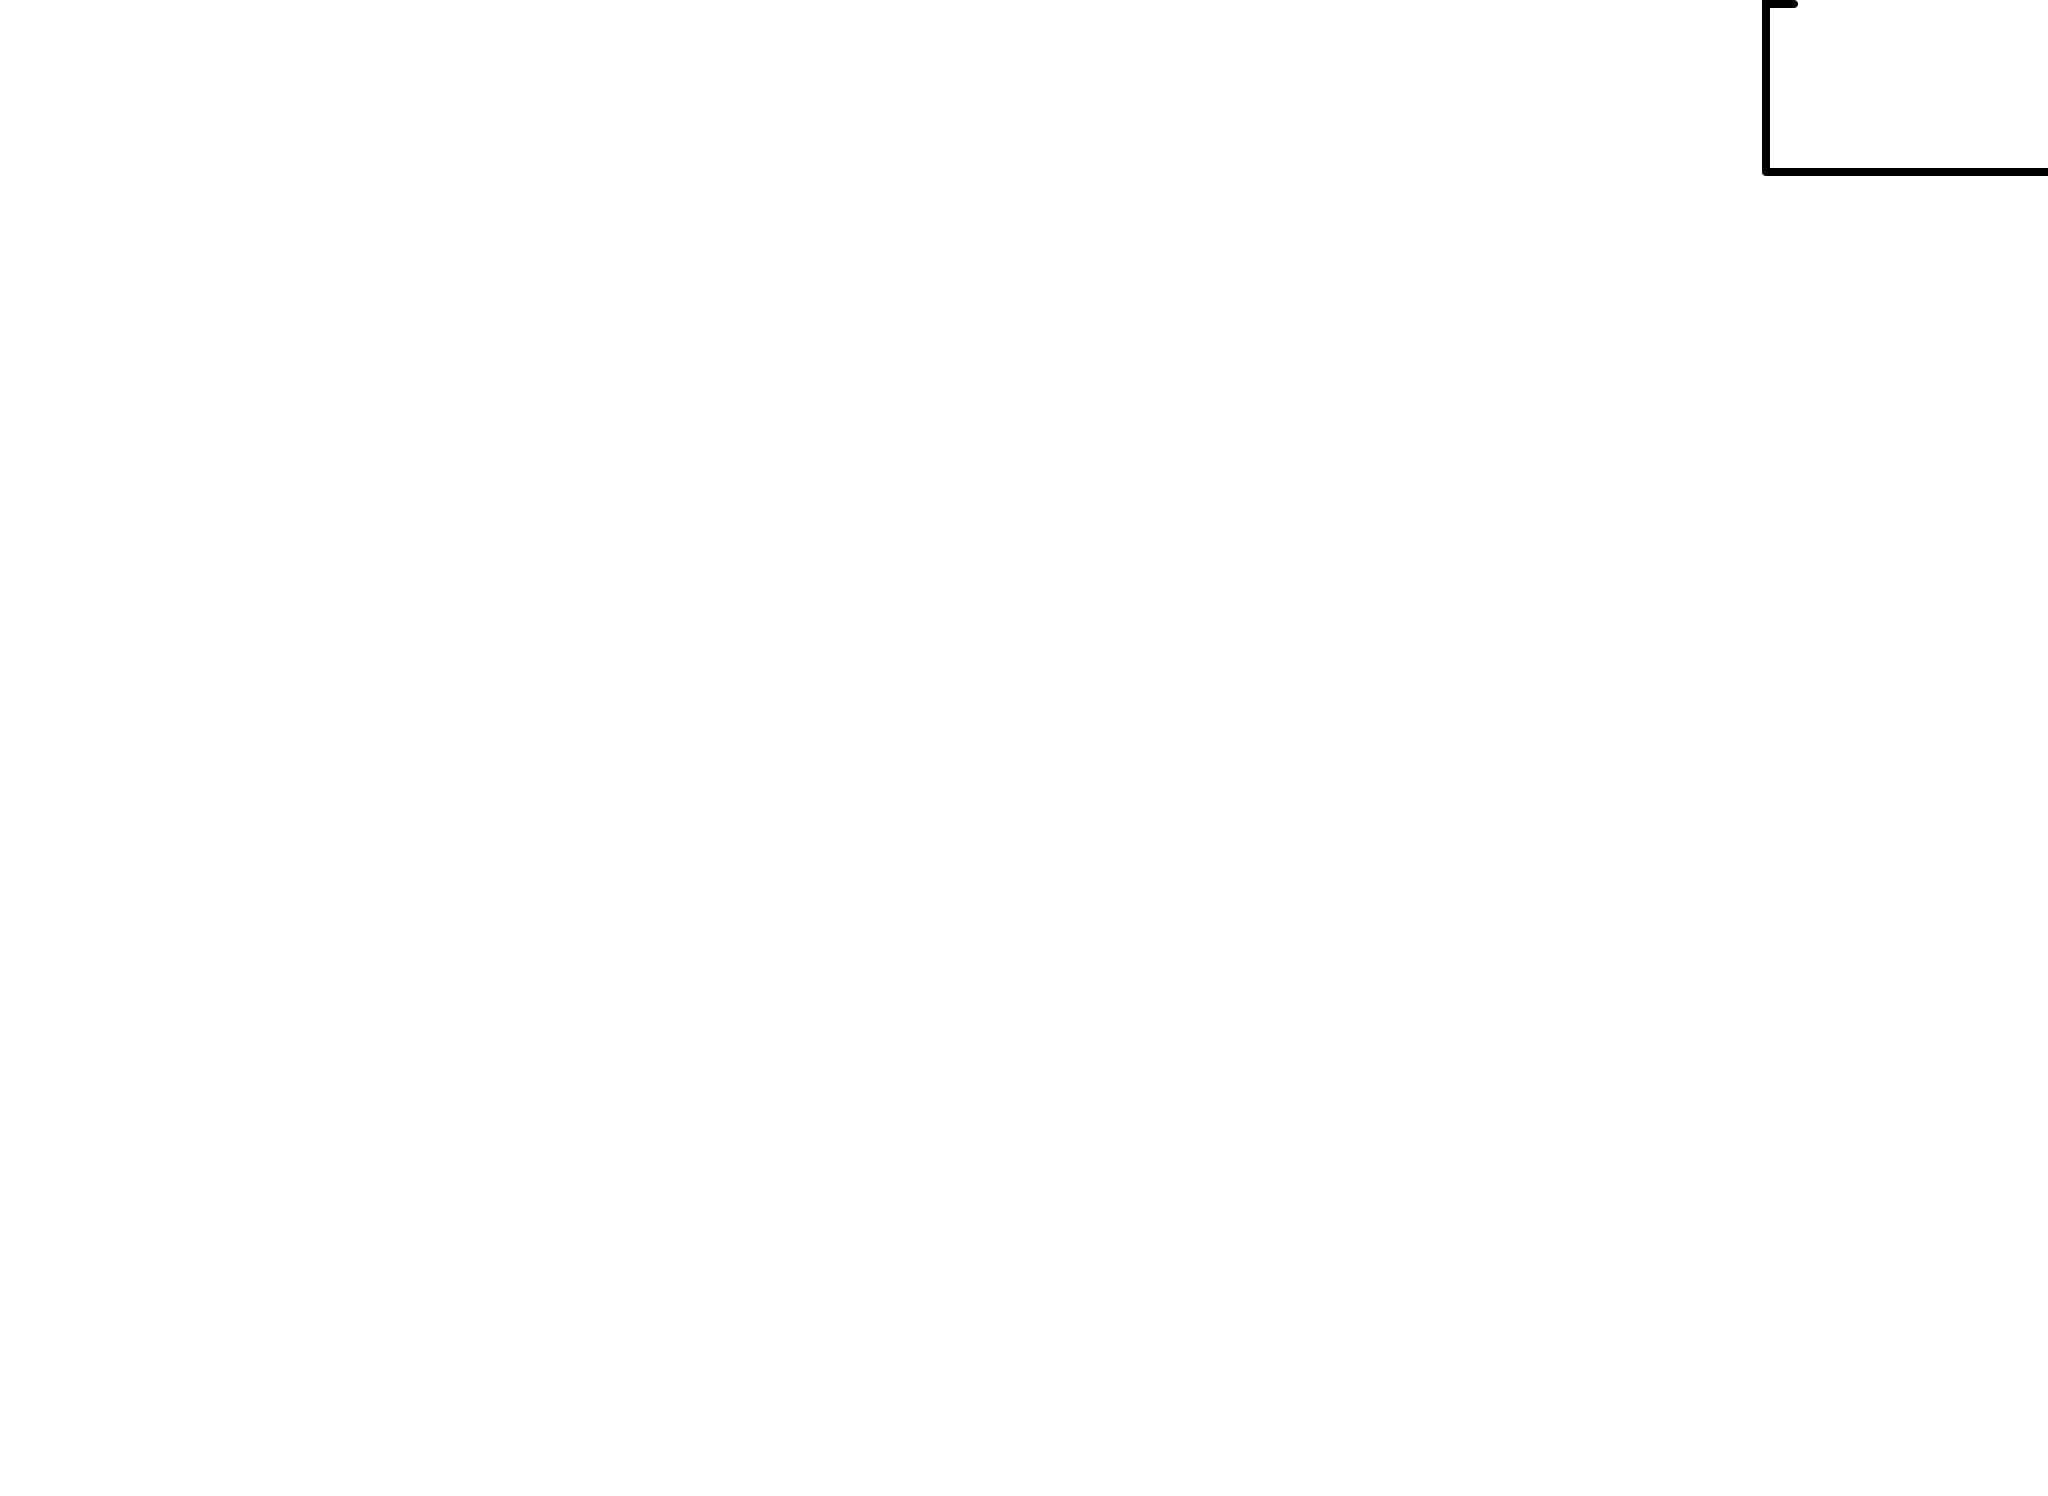

In [25]:
AllModels.clear()
mo = Model("tbabs*phabs*(apec+apec+apec)")
mo.apec.kT = 0.5
mo.apec_4.kT = 8.0
mo.apec_5.kT = 30.0
Fit.perform()
Plot("data resid")